In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ephre\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
import sys
sys.path.append(r'C:\Users\ephre\Documents\Financial News and Stock Price Integration\Scripts')
from correlation import Correlation

In [3]:
file_paths = {
    'df': r'C:\Users\ephre\Documents\Financial News and Stock Price Integration\data\raw_analyst_ratings\raw_analyst_ratings.csv',
    'AAPL': r'C:\Users\ephre\Documents\Financial News and Stock Price Integration\data\yfinance_data\AAPL_historical_data.csv',
    'AMZN': r'C:\Users\ephre\Documents\Financial News and Stock Price Integration\data\yfinance_data\AMZN_historical_data.csv',
    'GOOG': r'C:\Users\ephre\Documents\Financial News and Stock Price Integration\data\yfinance_data\GOOG_historical_data.csv',
    'META': r'C:\Users\ephre\Documents\Financial News and Stock Price Integration\data\yfinance_data\META_historical_data.csv',
    'MSFT': r'C:\Users\ephre\Documents\Financial News and Stock Price Integration\data\yfinance_data\MSFT_historical_data.csv',
    'NVDA': r'C:\Users\ephre\Documents\Financial News and Stock Price Integration\data\yfinance_data\NVDA_historical_data.csv',
    'TSLA': r'C:\Users\ephre\Documents\Financial News and Stock Price Integration\data\yfinance_data\NVDA_historical_data.csv'
}

## AAPL

In [4]:
co = Correlation(file_paths)

In [5]:
df_AAPL = co.read_csv_with_date(filepath=file_paths['AAPL'], date_col='Date')

In [6]:
co.check_nulls_and_info(df_AAPL, 'AAPL Data')

Total null values in AAPL Data: 0

AAPL Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10998 non-null  datetime64[ns]
 1   Open          10998 non-null  float64       
 2   High          10998 non-null  float64       
 3   Low           10998 non-null  float64       
 4   Close         10998 non-null  float64       
 5   Adj Close     10998 non-null  float64       
 6   Volume        10998 non-null  int64         
 7   Dividends     10998 non-null  float64       
 8   Stock Splits  10998 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 773.4 KB
None




In [7]:
df_AAPL = co.convert_to_datetime(df_AAPL, date_col='Date')
df_AAPL.head(3)

Date      Open      High       Low     Close  \
0 1980-12-12 00:00:00+00:00  0.128348  0.128906  0.128348  0.128348   
1 1980-12-15 00:00:00+00:00  0.122210  0.122210  0.121652  0.121652   
2 1980-12-16 00:00:00+00:00  0.113281  0.113281  0.112723  0.112723   

   Adj Close     Volume  Dividends  Stock Splits  
0   0.098943  469033600        0.0           0.0  
1   0.093781  175884800        0.0           0.0  
2   0.086898  105728000        0.0           0.0

In [8]:
df_AAPL = co.format_date_column(df_AAPL, date_col='Date')
df_AAPL.head(3)

Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0

## sentiment

In [9]:
df_raw = co.read_csv_with_date(filepath=file_paths['df'], date_col='date')
df_raw.sample(3)

Unnamed: 0                                           headline  \
1342166     1348537  Option Alert: WEN Feb17 10.0 Puts: 12400 @ ASK...   
308118       309852  Option Alert: CSX Aug $36 Call; 4000 Contract ...   
1093682     1099115  US Stock Futures Signal Lower Start On Wall St...   

                                                       url      publisher  \
1342166  https://www.benzinga.com/markets/options/16/11...  Charles Gross   
308118   https://www.benzinga.com/markets/options/15/04...  Charles Gross   
1093682  https://www.benzinga.com/news/13/05/3627508/us...  Monica Gerson   

                        date stock  
1342166  2016-11-08 00:00:00   WEN  
308118   2015-04-21 00:00:00   CSX  
1093682  2013-05-29 00:00:00  ROLL

In [10]:
sentiment_data = co.analyze_sentiment(df_raw)

In [11]:
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'], format='mixed', utc=True)
sentiment_data['date'] = sentiment_data['date'].dt.strftime('%Y-%m-%d')
sentiment_data.set_index('date', inplace=True)
sentiment_data

Unnamed: 0                                           headline  \
date                                                                        
2020-06-05           0            Stocks That Hit 52-Week Highs On Friday   
2020-06-03           1         Stocks That Hit 52-Week Highs On Wednesday   
2020-05-26           2                      71 Biggest Movers From Friday   
2020-05-22           3       46 Stocks Moving In Friday's Mid-Day Session   
2020-05-22           4  B of A Securities Maintains Neutral on Agilent...   
...                ...                                                ...   
2011-08-29     1413844             Top Narrow Based Indexes For August 29   
2011-06-22     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
2011-06-21     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
2011-06-21     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
2011-05-12     1413848  China Zenix Auto International Opens For Tradi...   

                                                          url  \
date                                                            
2020-06-05  https://www.benzinga.com/news/20/06/16190091/s...   
2020-06-03  https://www.benzinga.com/news/20/06/16170189/s...   
2020-05-26  https://www.benzinga.com/news/20/05/16103463/7...   
2020-05-22  https://www.benzinga.com/news/20/05/16095921/4...   
2020-05-22  https://www.benzinga.com/news/20/05/16095304/b...   
...                                                       ...   
2011-08-29  https://www.benzinga.com/news/11/08/1888782/to...   
2011-06-22  https://www.benzinga.com/news/earnings/11/06/1...   
2011-06-21  https://www.benzinga.com/analyst-ratings/analy...   
2011-06-21  https://www.benzinga.com/analyst-ratings/price...   
2011-05-12  https://www.benzinga.com/news/ipos/11/05/10789...   

                    publisher stock  sentiment sentiment_category  
date                                                               
2020-06-05  Benzinga Insights     A     0.0000            Neutral  
2020-06-03  Benzinga Insights     A     0.0000            Neutral  
2020-05-26         Lisa Levin     A     0.0000            Neutral  
2020-05-22         Lisa Levin     A     0.0000            Neutral  
2020-05-22         Vick Meyer     A     0.2960           Positive  
...                       ...   ...        ...                ...  
2011-08-29      Monica Gerson    ZX     0.2023           Positive  
2011-06-22       Benjamin Lee    ZX    -0.3818           Negative  
2011-06-21     BenzingaStaffL    ZX     0.0000            Neutral  
2011-06-21          Joe Young    ZX     0.0000            Neutral  
2011-05-12      Allie Wickman    ZX     0.0000            Neutral  

[1407328 rows x 7 columns]

In [12]:
df_AAPL.rename(columns={"Date": "date"}, inplace=True)
df_AAPL.set_index('date', inplace=True)
df_AAPL.sample(5)

Open        High         Low       Close   Adj Close  \
date                                                                     
1985-05-29    0.076451    0.077009    0.076451    0.076451    0.058936   
2008-10-17    3.557143    3.644286    3.067500    3.478571    2.937567   
1994-12-09    0.320313    0.324777    0.310268    0.323661    0.270239   
2023-03-06  153.789993  156.300003  153.460007  153.830002  152.629349   
2003-10-31    0.416071    0.416964    0.406786    0.408750    0.345179   

                Volume  Dividends  Stock Splits  
date                                             
1985-05-29   246556800        0.0           0.0  
2008-10-17  1762227600        0.0           0.0  
1994-12-09   260724800        0.0           0.0  
2023-03-06    87558000        0.0           0.0  
2003-10-31   218153600        0.0           0.0

In [13]:
df_AAPL = co.calculate_daily_returns(df_AAPL)

In [14]:
daily_sentiment_AAPL = co.aggregate_daily_sentiment(sentiment_data)
daily_sentiment_AAPL['date'] = pd.to_datetime(daily_sentiment_AAPL['date'], format='mixed', utc=True)
daily_sentiment_AAPL['date'] = daily_sentiment_AAPL['date'].dt.strftime('%Y-%m-%d')
daily_sentiment_AAPL.set_index("date", inplace=True)
daily_sentiment_AAPL


average_sentiment
date                         
2009-02-14           0.226300
2009-04-27           0.000000
2009-04-29           0.000000
2009-05-22           0.000000
2009-05-27           0.751050
...                       ...
2020-06-07           0.040156
2020-06-08           0.250061
2020-06-09           0.283393
2020-06-10           0.044021
2020-06-11           0.122841

[3955 rows x 1 columns]

In [15]:
aligned_date_AAPL = co.merge_dataframes(df_AAPL, daily_sentiment_AAPL)
aligned_date_AAPL


Open       High        Low      Close  Adj Close     Volume  \
date                                                                           
2009-04-27   4.389286   4.464286   4.380714   4.454643   3.761836  480690000   
2009-04-29   4.458929   4.530357   4.422500   4.469286   3.774201  458110800   
2009-05-22   4.430357   4.435000   4.348214   4.375000   3.694580  297998400   
2009-05-27   4.706429   4.820714   4.675357   4.751786   4.012765  646422000   
2009-05-29   4.835357   4.853571   4.780357   4.850357   4.096007  456534400   
...               ...        ...        ...        ...        ...        ...   
2020-06-05  80.837502  82.937500  80.807503  82.875000  80.843407  137250400   
2020-06-08  82.562500  83.400002  81.830002  83.364998  81.321381   95654400   
2020-06-09  83.035004  86.402496  83.002502  85.997498  83.889359  147712400   
2020-06-10  86.974998  88.692497  86.522499  88.209999  86.047615  166651600   
2020-06-11  87.327499  87.764999  83.870003  83.974998  81.916420  201662400   

            Dividends  Stock Splits  Daily Returns  average_sentiment  
date                                                                   
2009-04-27        0.0           0.0       0.006699           0.000000  
2009-04-29        0.0           0.0       0.010008           0.000000  
2009-05-22        0.0           0.0      -0.013529           0.000000  
2009-05-27        0.0           0.0       0.017358           0.751050  
2009-05-29        0.0           0.0       0.005479           0.000000  
...               ...           ...            ...                ...  
2020-06-05        0.0           0.0       0.028481           0.498827  
2020-06-08        0.0           0.0       0.005912           0.250061  
2020-06-09        0.0           0.0       0.031578           0.283393  
2020-06-10        0.0           0.0       0.025728           0.044021  
2020-06-11        0.0           0.0      -0.048010           0.122841  

[2757 rows x 10 columns]

Correlation between sentiment and daily stock returns: 0.14605816008631778


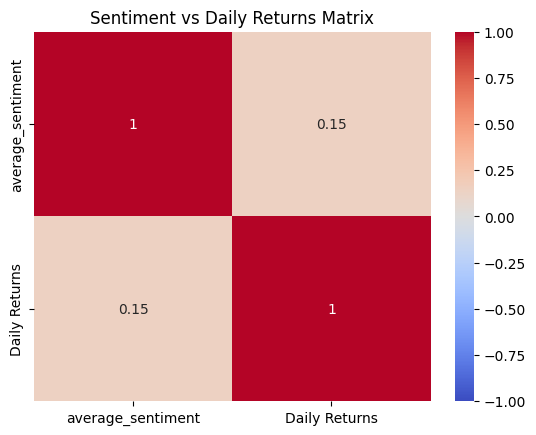

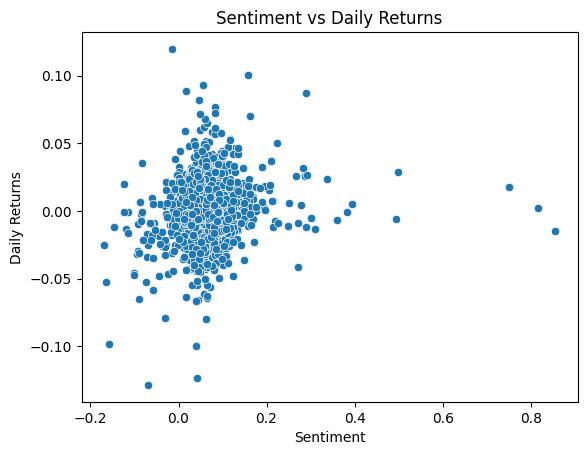

In [16]:
co.analyze_correlation_and_plot(aligned_date_AAPL)

Correlation between sentiment and daily stock returns: -0.008172849968706975


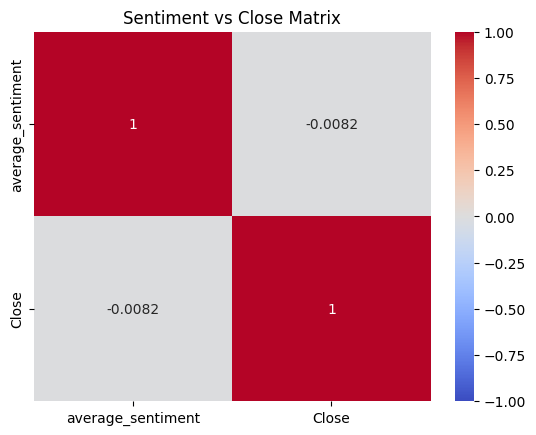

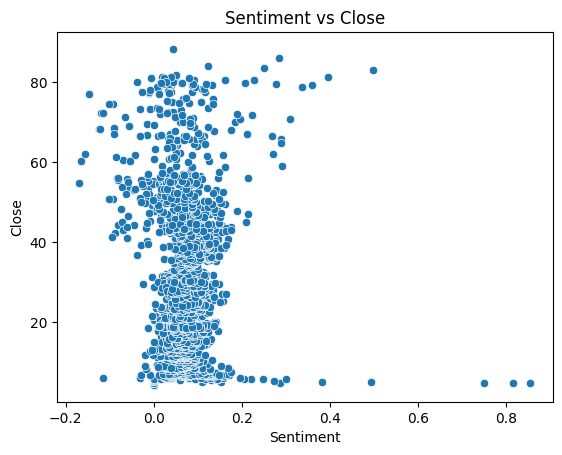

In [17]:
co.analyze_correlation_and_plot(aligned_date_AAPL, returns_col='Close')

Correlation between sentiment and daily stock returns: -0.010513086158428029


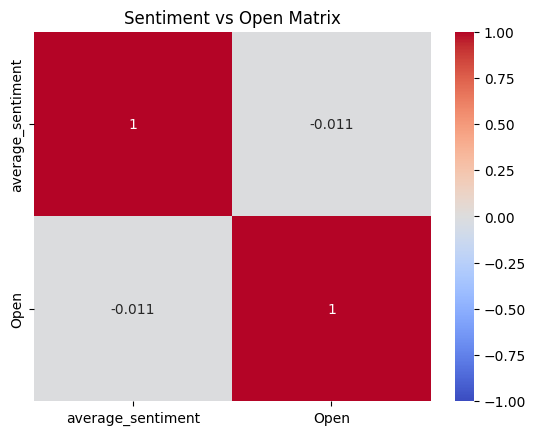

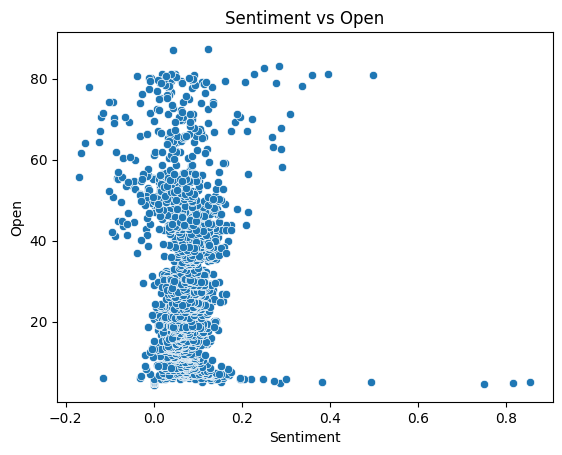

In [18]:
co.analyze_correlation_and_plot(aligned_date_AAPL, returns_col='Open')

Correlation between sentiment and daily stock returns: -0.011994616719998267


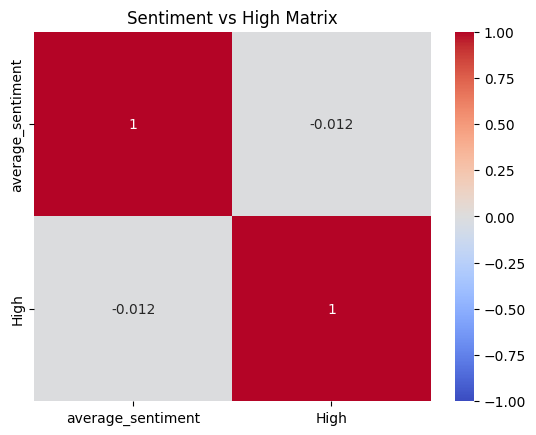

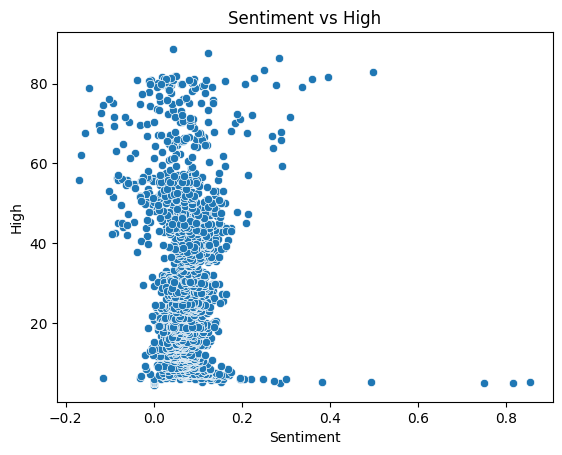

In [19]:
co.analyze_correlation_and_plot(aligned_date_AAPL, returns_col='High')

Correlation between sentiment and daily stock returns: -0.007611969259365162


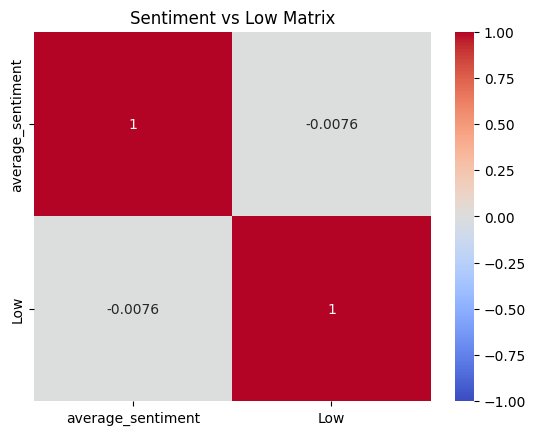

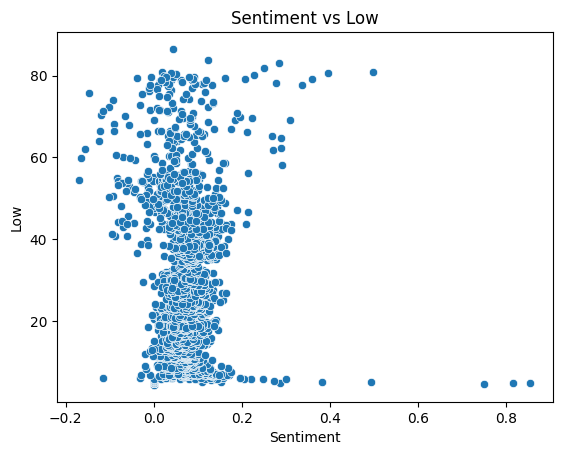

In [20]:
co.analyze_correlation_and_plot(aligned_date_AAPL, returns_col='Low')

Correlation between sentiment and daily stock returns: -0.0061477063917719675


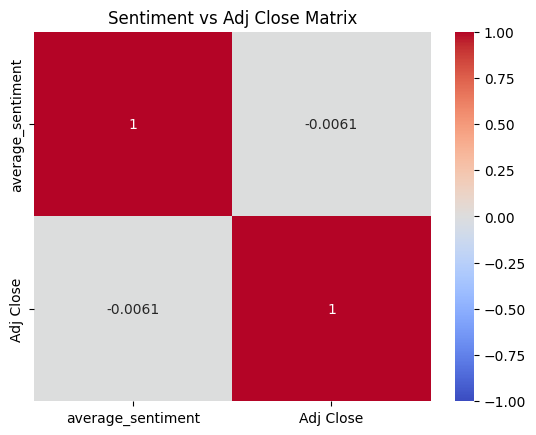

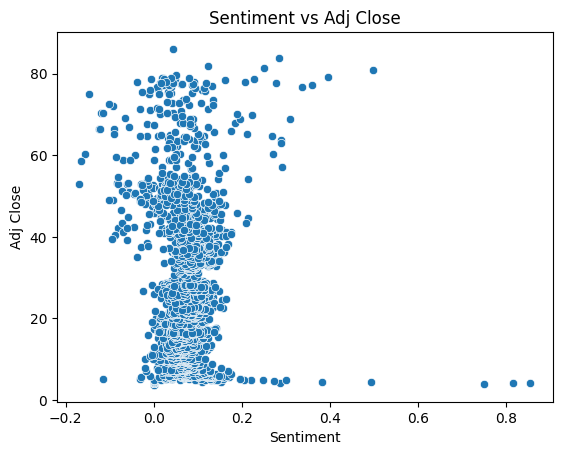

In [21]:
co.analyze_correlation_and_plot(aligned_date_AAPL, returns_col='Adj Close')

## AMZN

In [22]:
df_AMZN = co.read_csv_with_date(filepath=file_paths['AMZN'], date_col='Date')

In [23]:
co.check_nulls_and_info(df_AMZN, 'AMZN Data')

Total null values in AMZN Data: 0

AMZN Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6846 non-null   datetime64[ns]
 1   Open          6846 non-null   float64       
 2   High          6846 non-null   float64       
 3   Low           6846 non-null   float64       
 4   Close         6846 non-null   float64       
 5   Adj Close     6846 non-null   float64       
 6   Volume        6846 non-null   int64         
 7   Dividends     6846 non-null   float64       
 8   Stock Splits  6846 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 481.5 KB
None




In [24]:
df_AMZN = co.convert_to_datetime(df_AMZN, date_col='Date')
df_AMZN.head(3)

Date      Open      High       Low     Close  \
0 1997-05-15 00:00:00+00:00  0.121875  0.125000  0.096354  0.097917   
1 1997-05-16 00:00:00+00:00  0.098438  0.098958  0.085417  0.086458   
2 1997-05-19 00:00:00+00:00  0.088021  0.088542  0.081250  0.085417   

   Adj Close      Volume  Dividends  Stock Splits  
0   0.097917  1443120000        0.0           0.0  
1   0.086458   294000000        0.0           0.0  
2   0.085417   122136000        0.0           0.0

In [25]:
df_AMZN = co.format_date_column(df_AMZN, date_col='Date')
df_AMZN.head(3)

Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0

In [26]:
df_AMZN.rename(columns={"Date": "date"}, inplace=True)
df_AMZN.set_index('date', inplace=True)
df_AMZN.sample(5)

Open        High         Low       Close   Adj Close  \
date                                                                     
1997-05-30    0.075000    0.075521    0.073958    0.075000    0.075000   
2011-01-19    9.545000    9.550000    9.310500    9.343500    9.343500   
2014-11-19   16.362499   16.420000   16.201000   16.327000   16.327000   
2006-07-26    1.438000    1.450000    1.298000    1.313000    1.313000   
2020-12-30  167.050003  167.104996  164.123505  164.292496  164.292496   

                Volume  Dividends  Stock Splits  
date                                             
1997-05-30    51888000        0.0           0.0  
2011-01-19    77648000        0.0           0.0  
2014-11-19    65632000        0.0           0.0  
2006-07-26  1539704000        0.0           0.0  
2020-12-30    64186000        0.0           0.0

In [27]:
df_AMZN = co.calculate_daily_returns(df_AMZN)

In [28]:
daily_sentiment_AMZN = co.aggregate_daily_sentiment(sentiment_data)
daily_sentiment_AMZN['date'] = pd.to_datetime(daily_sentiment_AMZN['date'], format='mixed', utc=True)
daily_sentiment_AMZN['date'] = daily_sentiment_AMZN['date'].dt.strftime('%Y-%m-%d')
daily_sentiment_AMZN.set_index("date", inplace=True)
daily_sentiment_AMZN

average_sentiment
date                         
2009-02-14           0.226300
2009-04-27           0.000000
2009-04-29           0.000000
2009-05-22           0.000000
2009-05-27           0.751050
...                       ...
2020-06-07           0.040156
2020-06-08           0.250061
2020-06-09           0.283393
2020-06-10           0.044021
2020-06-11           0.122841

[3955 rows x 1 columns]

In [29]:
aligned_date_AMZN = co.merge_dataframes(df_AMZN, daily_sentiment_AMZN)

Correlation between sentiment and daily stock returns: 0.08223958354879742


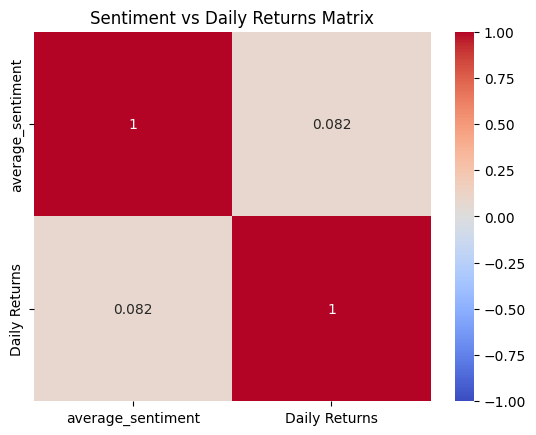

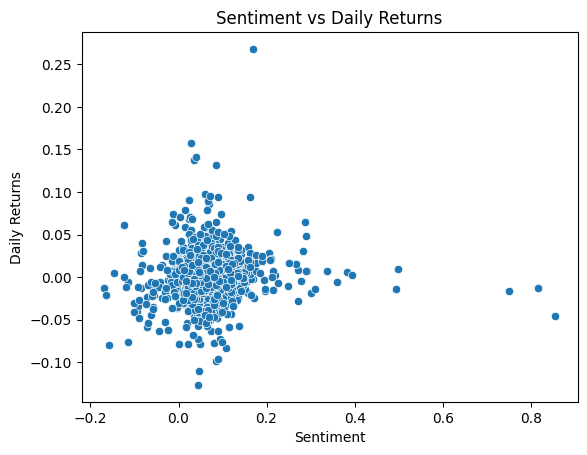

In [30]:
co.analyze_correlation_and_plot(aligned_date_AMZN)

Correlation between sentiment and daily stock returns: -0.0044206971287268255


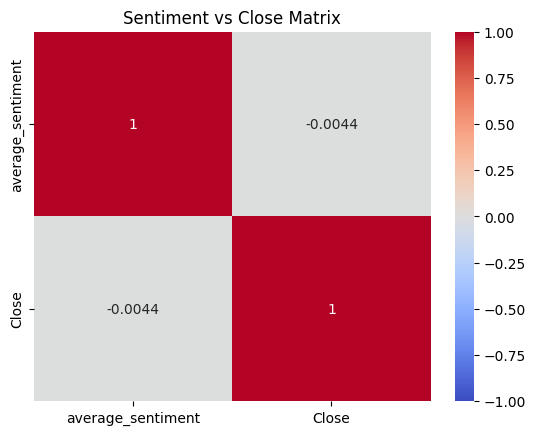

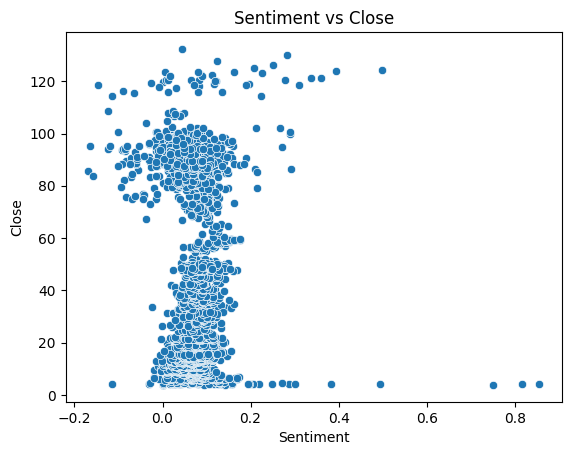

In [31]:
co.analyze_correlation_and_plot(aligned_date_AMZN, returns_col='Close')

Correlation between sentiment and daily stock returns: -0.006090967583049365


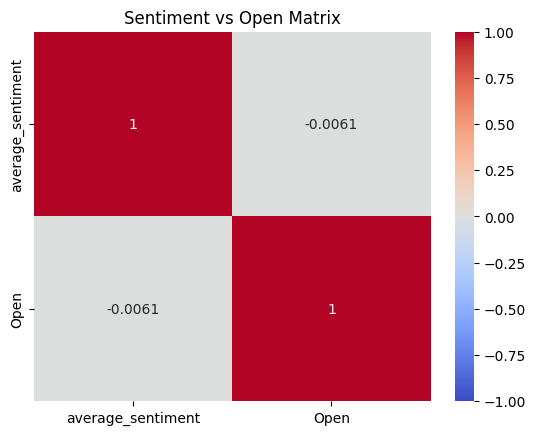

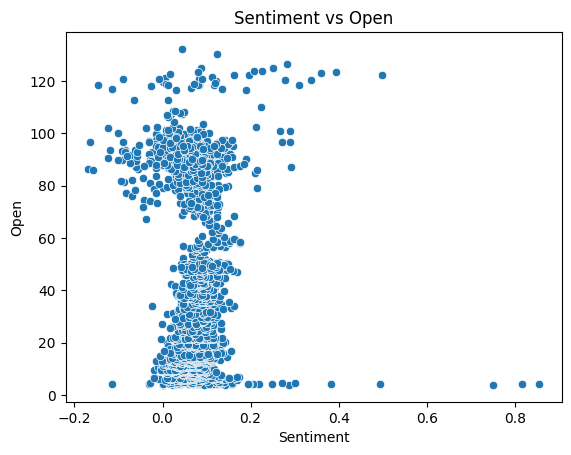

In [32]:
co.analyze_correlation_and_plot(aligned_date_AMZN, returns_col='Open')

Correlation between sentiment and daily stock returns: -0.007402988777612537


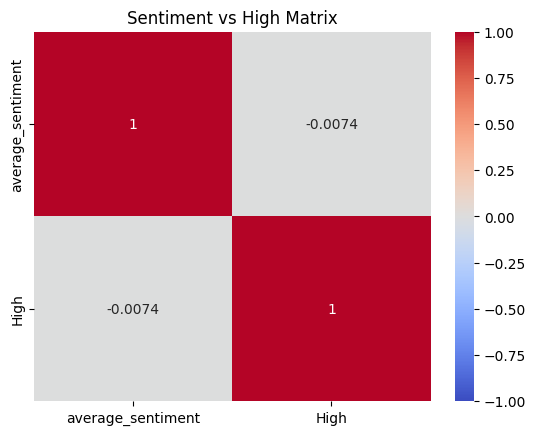

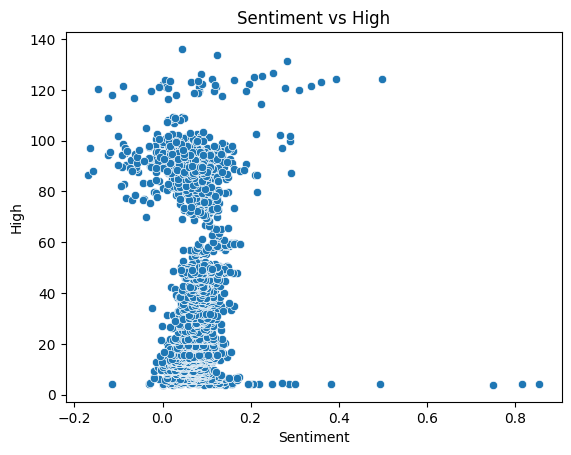

In [33]:
co.analyze_correlation_and_plot(aligned_date_AMZN, returns_col='High')

Correlation between sentiment and daily stock returns: -0.0036682865234306267


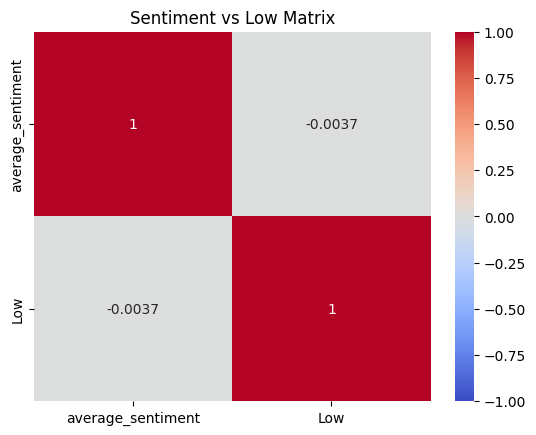

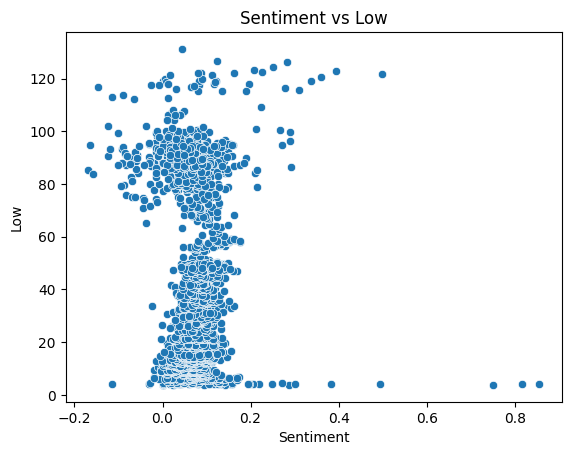

In [34]:
co.analyze_correlation_and_plot(aligned_date_AMZN, returns_col='Low')

Correlation between sentiment and daily stock returns: -0.0044206971287268255


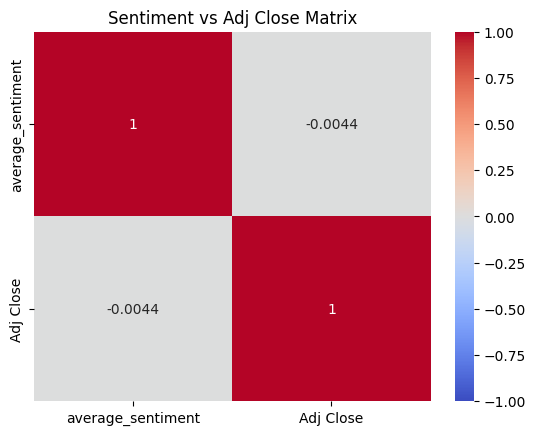

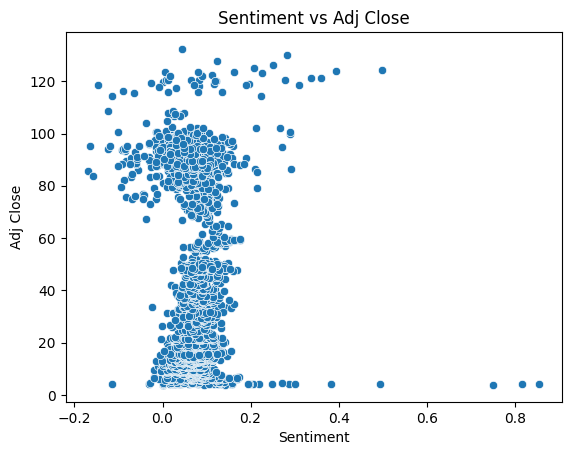

In [35]:
co.analyze_correlation_and_plot(aligned_date_AMZN, returns_col='Adj Close')

## GOOG

In [36]:
df_GOOG = co.read_csv_with_date(filepath=file_paths['GOOG'], date_col='Date')

In [37]:
co.check_nulls_and_info(df_GOOG, 'GOOG Data')

Total null values in GOOG Data: 0

GOOG Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5020 non-null   datetime64[ns]
 1   Open          5020 non-null   float64       
 2   High          5020 non-null   float64       
 3   Low           5020 non-null   float64       
 4   Close         5020 non-null   float64       
 5   Adj Close     5020 non-null   float64       
 6   Volume        5020 non-null   int64         
 7   Dividends     5020 non-null   float64       
 8   Stock Splits  5020 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 353.1 KB
None




In [38]:
df_GOOG = co.convert_to_datetime(df_GOOG, date_col='Date')
df_GOOG.head(3)

Date      Open      High       Low     Close  \
0 2004-08-19 00:00:00+00:00  2.490664  2.591785  2.390042  2.499133   
1 2004-08-20 00:00:00+00:00  2.515820  2.716817  2.503118  2.697639   
2 2004-08-23 00:00:00+00:00  2.758411  2.826406  2.716070  2.724787   

   Adj Close     Volume  Dividends  Stock Splits  
0   2.496292  897427216        0.0           0.0  
1   2.694573  458857488        0.0           0.0  
2   2.721690  366857939        0.0           0.0

In [39]:
df_GOOG = co.format_date_column(df_GOOG, date_col='Date')
df_GOOG.head(3)

Date      Open      High       Low     Close  Adj Close     Volume  \
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.694573  458857488   
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.721690  366857939   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0

In [40]:
df_GOOG.rename(columns={"Date": "date"}, inplace=True)
df_GOOG.set_index('date', inplace=True)
df_GOOG.sample(5)

Open       High        Low      Close  Adj Close     Volume  \
date                                                                           
2005-01-11   4.872238   4.924293   4.811465   4.820432   4.814953  279391317   
2009-06-29  10.610230  10.655062  10.516581  10.563904  10.551896   87097243   
2008-05-21  14.408992  14.480972  13.646101  13.698405  13.682835  259693761   
2017-06-12  46.978001  47.467751  45.761650  47.145000  47.091412   75270000   
2004-11-10   4.250817   4.296894   4.142722   4.180829   4.176077  427355853   

            Dividends  Stock Splits  
date                                 
2005-01-11        0.0           0.0  
2009-06-29        0.0           0.0  
2008-05-21        0.0           0.0  
2017-06-12        0.0           0.0  
2004-11-10        0.0           0.0

In [41]:
df_GOOG = co.calculate_daily_returns(df_GOOG)

In [42]:
daily_sentiment_GOOG = co.aggregate_daily_sentiment(sentiment_data)
daily_sentiment_GOOG['date'] = pd.to_datetime(daily_sentiment_GOOG['date'], format='mixed', utc=True)
daily_sentiment_GOOG['date'] = daily_sentiment_GOOG['date'].dt.strftime('%Y-%m-%d')
daily_sentiment_GOOG.set_index("date", inplace=True)
daily_sentiment_GOOG

average_sentiment
date                         
2009-02-14           0.226300
2009-04-27           0.000000
2009-04-29           0.000000
2009-05-22           0.000000
2009-05-27           0.751050
...                       ...
2020-06-07           0.040156
2020-06-08           0.250061
2020-06-09           0.283393
2020-06-10           0.044021
2020-06-11           0.122841

[3955 rows x 1 columns]

In [43]:
aligned_date_GOOG = co.merge_dataframes(df_GOOG, daily_sentiment_GOOG)

Correlation between sentiment and daily stock returns: 0.12544420764526076


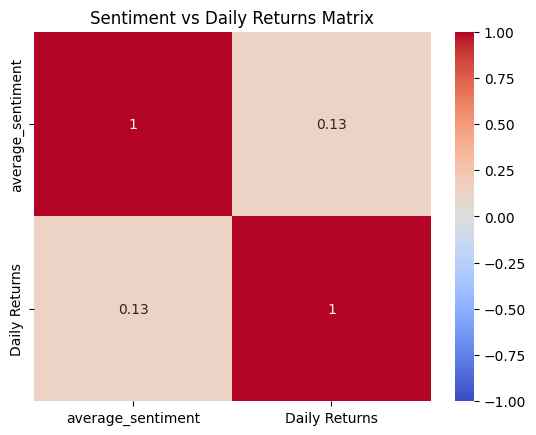

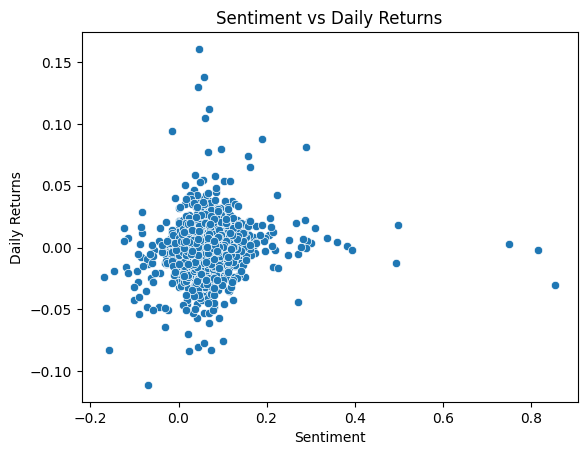

In [44]:
co.analyze_correlation_and_plot(aligned_date_GOOG)

Correlation between sentiment and daily stock returns: 0.03809770395054717


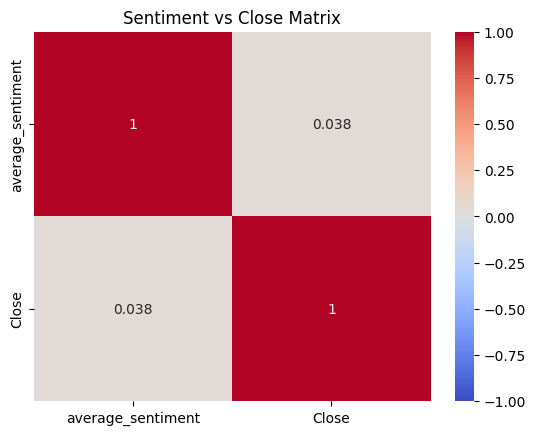

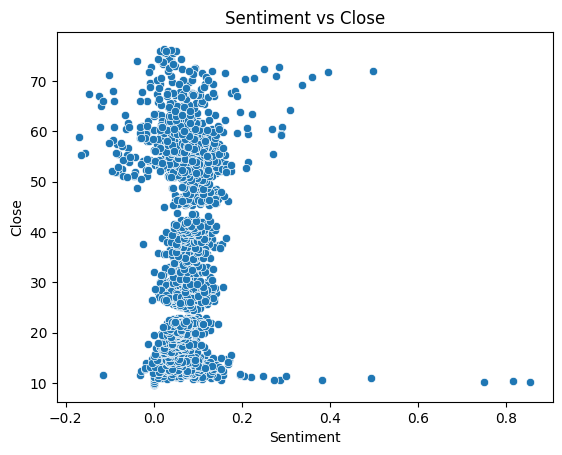

In [45]:
co.analyze_correlation_and_plot(aligned_date_GOOG, returns_col='Close')

Correlation between sentiment and daily stock returns: 0.036217987818307824


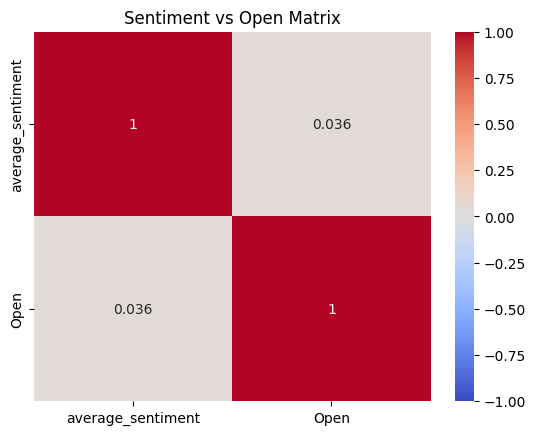

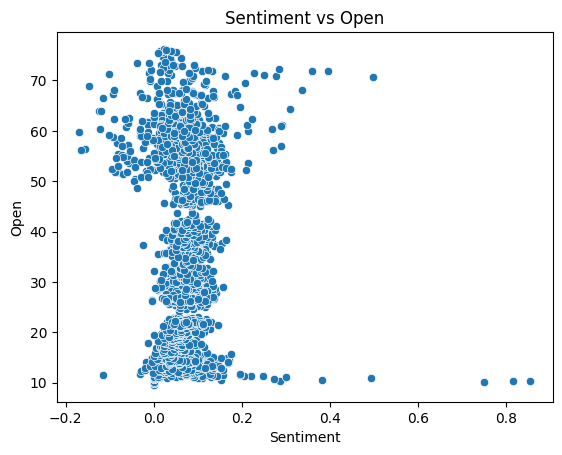

In [46]:
co.analyze_correlation_and_plot(aligned_date_GOOG, returns_col='Open')

Correlation between sentiment and daily stock returns: 0.034998604208657254


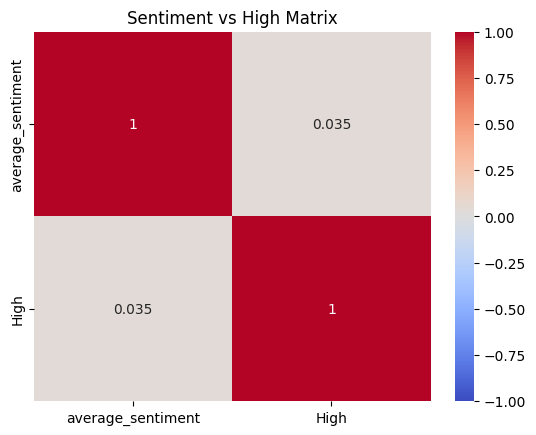

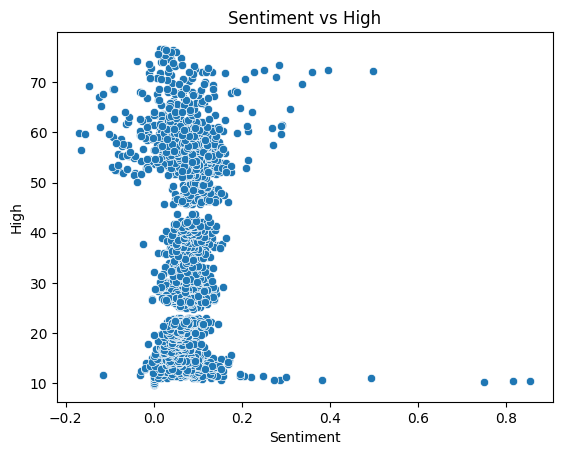

In [47]:
co.analyze_correlation_and_plot(aligned_date_GOOG, returns_col='High')

Correlation between sentiment and daily stock returns: 0.038951846869248144


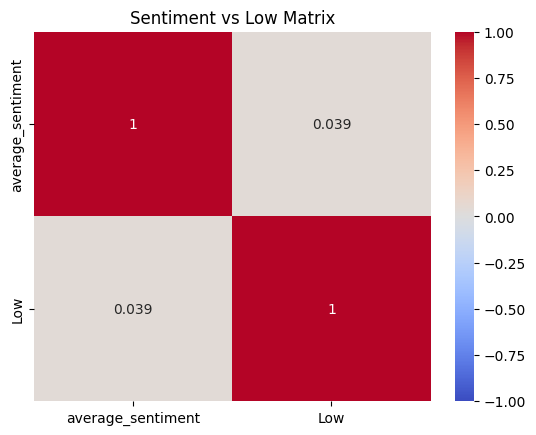

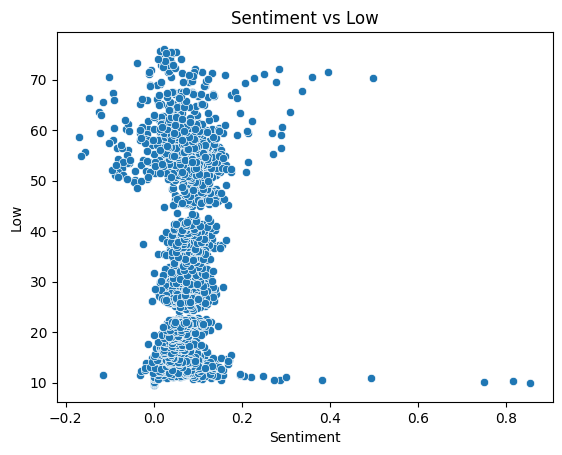

In [48]:
co.analyze_correlation_and_plot(aligned_date_GOOG, returns_col='Low')

Correlation between sentiment and daily stock returns: 0.03809770369945629


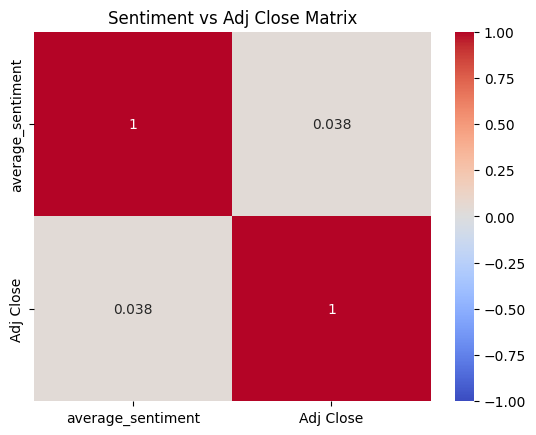

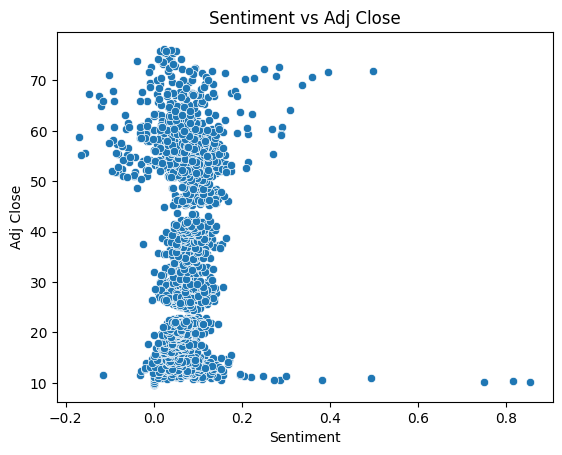

In [49]:
co.analyze_correlation_and_plot(aligned_date_GOOG, returns_col='Adj Close')

## META

In [50]:
df_META = co.read_csv_with_date(filepath=file_paths['META'], date_col='Date')

In [51]:
co.check_nulls_and_info(df_META, 'META Data')

Total null values in META Data: 0

META Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2926 non-null   datetime64[ns]
 1   Open          2926 non-null   float64       
 2   High          2926 non-null   float64       
 3   Low           2926 non-null   float64       
 4   Close         2926 non-null   float64       
 5   Adj Close     2926 non-null   float64       
 6   Volume        2926 non-null   int64         
 7   Dividends     2926 non-null   float64       
 8   Stock Splits  2926 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 205.9 KB
None




In [52]:
df_META = co.convert_to_datetime(df_META, date_col='Date')
df_META.head(3)

Date   Open       High        Low      Close  \
0 2012-12-12 00:00:00+00:00  28.00  28.139999  27.370001  27.580000   
1 2012-12-13 00:00:00+00:00  27.59  28.750000  27.430000  28.240000   
2 2012-12-14 00:00:00+00:00  28.18  28.330000  26.760000  26.809999   

   Adj Close    Volume  Dividends  Stock Splits  
0  27.523441  46704200        0.0           0.0  
1  28.182087  81051600        0.0           0.0  
2  26.755020  91631600        0.0           0.0

In [53]:
df_META = co.format_date_column(df_META, date_col='Date')
df_META.head(3)

Date   Open       High        Low      Close  Adj Close    Volume  \
0  2012-12-12  28.00  28.139999  27.370001  27.580000  27.523441  46704200   
1  2012-12-13  27.59  28.750000  27.430000  28.240000  28.182087  81051600   
2  2012-12-14  28.18  28.330000  26.760000  26.809999  26.755020  91631600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0

In [54]:
df_META.rename(columns={"Date": "date"}, inplace=True)
df_META.set_index('date', inplace=True)
df_META.sample(5)

Open        High         Low       Close   Adj Close  \
date                                                                     
2024-06-06  492.980011  502.820007  490.890015  493.760010  493.270264   
2014-11-12   74.279999   75.139999   73.540001   74.720001   74.566772   
2021-12-08  325.000000  332.750000  323.070007  330.559998  329.882111   
2017-07-17  160.250000  160.779999  158.809998  159.729996  159.402435   
2017-05-23  148.520004  148.809998  147.250000  148.070007  147.766357   

              Volume  Dividends  Stock Splits  
date                                           
2024-06-06  10667300        0.0           0.0  
2014-11-12  26536600        0.0           0.0  
2021-12-08  19937700        0.0           0.0  
2017-07-17  12858800        0.0           0.0  
2017-05-23  12817800        0.0           0.0

In [55]:
df_META = co.calculate_daily_returns(df_META)

In [56]:
daily_sentiment_META = co.aggregate_daily_sentiment(sentiment_data)
daily_sentiment_META['date'] = pd.to_datetime(daily_sentiment_META['date'], format='mixed', utc=True)
daily_sentiment_META['date'] = daily_sentiment_META['date'].dt.strftime('%Y-%m-%d')
daily_sentiment_META.set_index("date", inplace=True)
daily_sentiment_META

average_sentiment
date                         
2009-02-14           0.226300
2009-04-27           0.000000
2009-04-29           0.000000
2009-05-22           0.000000
2009-05-27           0.751050
...                       ...
2020-06-07           0.040156
2020-06-08           0.250061
2020-06-09           0.283393
2020-06-10           0.044021
2020-06-11           0.122841

[3955 rows x 1 columns]

In [57]:
aligned_date_META = co.merge_dataframes(df_META, daily_sentiment_META)

Correlation between sentiment and daily stock returns: 0.16399365746755012


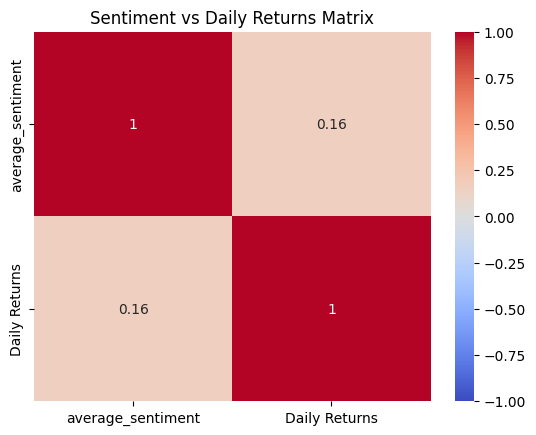

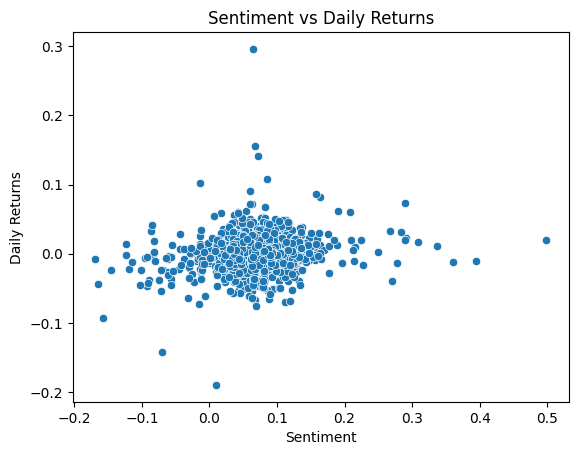

In [58]:
co.analyze_correlation_and_plot(aligned_date_META)

Correlation between sentiment and daily stock returns: 0.03357351345027622


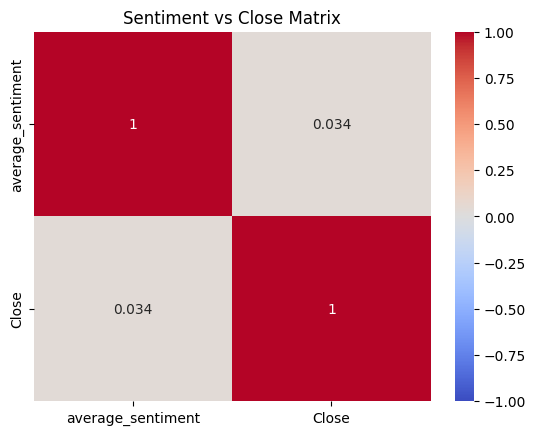

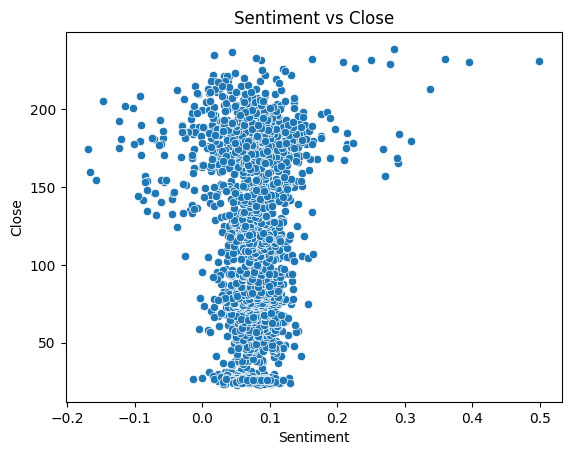

In [59]:
co.analyze_correlation_and_plot(aligned_date_META, returns_col='Close')

Correlation between sentiment and daily stock returns: 0.030479735827315876


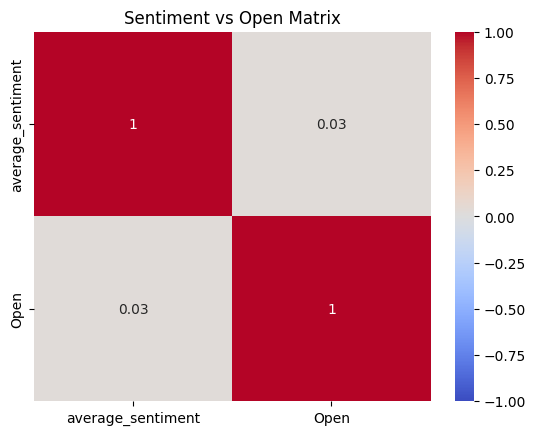

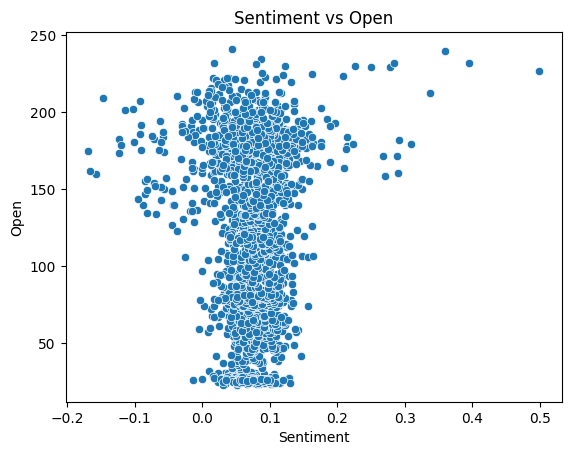

In [60]:
co.analyze_correlation_and_plot(aligned_date_META, returns_col='Open')

Correlation between sentiment and daily stock returns: 0.028348263322163243


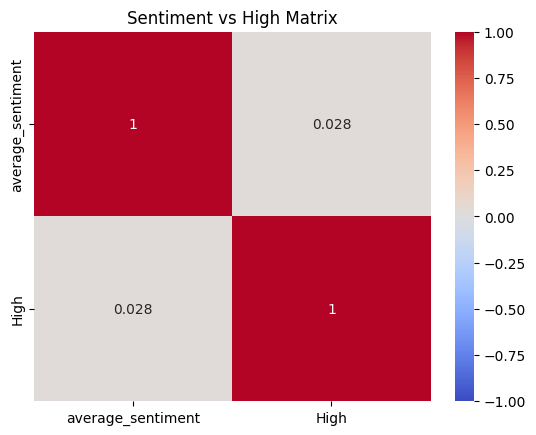

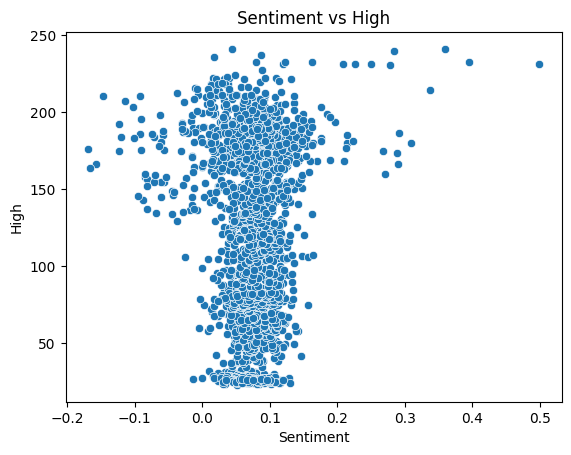

In [61]:
co.analyze_correlation_and_plot(aligned_date_META, returns_col='High')

Correlation between sentiment and daily stock returns: 0.034409190829251014


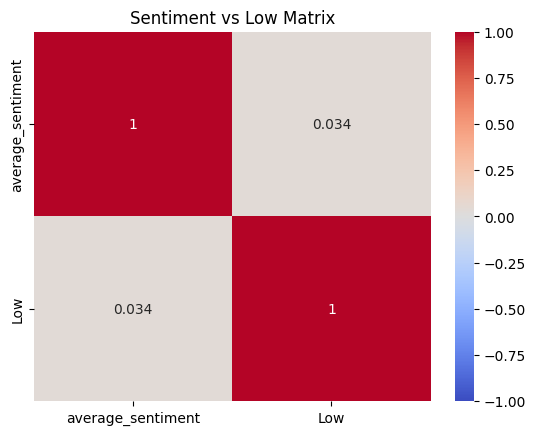

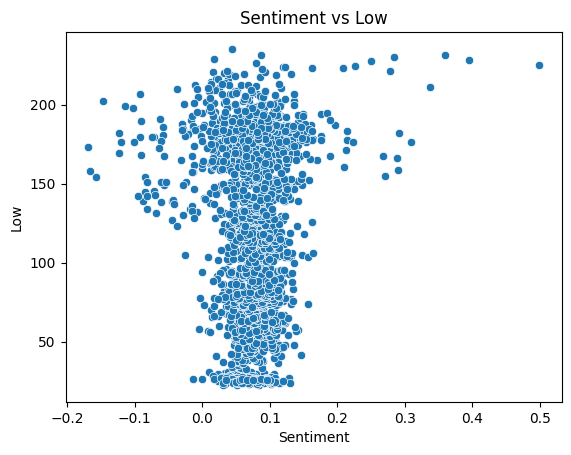

In [62]:
co.analyze_correlation_and_plot(aligned_date_META, returns_col='Low')

Correlation between sentiment and daily stock returns: 0.03357351153063305


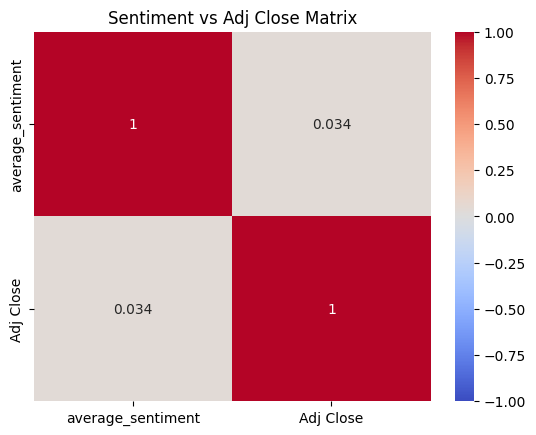

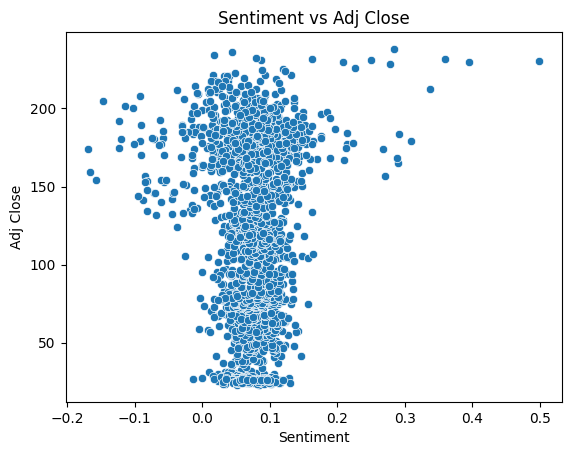

In [63]:
co.analyze_correlation_and_plot(aligned_date_META, returns_col='Adj Close')

## MSFT

In [64]:
df_MSFT = co.read_csv_with_date(filepath=file_paths['MSFT'], date_col='Date')

In [65]:
co.check_nulls_and_info(df_MSFT, 'MSFT Data')

Total null values in MSFT Data: 0

MSFT Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9672 entries, 0 to 9671
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          9672 non-null   datetime64[ns]
 1   Open          9672 non-null   float64       
 2   High          9672 non-null   float64       
 3   Low           9672 non-null   float64       
 4   Close         9672 non-null   float64       
 5   Adj Close     9672 non-null   float64       
 6   Volume        9672 non-null   int64         
 7   Dividends     9672 non-null   float64       
 8   Stock Splits  9672 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 680.2 KB
None




In [66]:
df_MSFT = co.convert_to_datetime(df_MSFT, date_col='Date')
df_MSFT.head(3)

Date      Open      High       Low     Close  \
0 1986-03-13 00:00:00+00:00  0.088542  0.101563  0.088542  0.097222   
1 1986-03-14 00:00:00+00:00  0.097222  0.102431  0.097222  0.100694   
2 1986-03-17 00:00:00+00:00  0.100694  0.103299  0.100694  0.102431   

   Adj Close      Volume  Dividends  Stock Splits  
0   0.059946  1031788800        0.0           0.0  
1   0.062087   308160000        0.0           0.0  
2   0.063158   133171200        0.0           0.0

In [67]:
df_MSFT = co.format_date_column(df_MSFT, date_col='Date')
df_MSFT.head(3)

Date      Open      High       Low     Close  Adj Close      Volume  \
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.059946  1031788800   
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.062087   308160000   
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.063158   133171200   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0

In [68]:
df_MSFT.rename(columns={"Date": "date"}, inplace=True)
df_MSFT.set_index('date', inplace=True)
df_MSFT.sample(5)

Open        High         Low       Close   Adj Close  \
date                                                                     
2011-01-27   28.750000   29.459999   28.490000   28.870001   22.231842   
2014-06-26   41.930000   41.939999   41.430000   41.720001   35.449982   
1986-10-06    0.100694    0.107639    0.100694    0.105903    0.065299   
2010-10-04   23.959999   23.990000   23.780001   23.910000   18.299864   
2020-10-28  207.669998  208.839996  202.100006  202.679993  195.793686   

               Volume  Dividends  Stock Splits  
date                                            
2011-01-27  146938600        0.0           0.0  
2014-06-26   23604400        0.0           0.0  
1986-10-06   85334400        0.0           0.0  
2010-10-04   98143400        0.0           0.0  
2020-10-28   51195600        0.0           0.0

In [69]:
df_MSFT = co.calculate_daily_returns(df_MSFT)

In [70]:
daily_sentiment_MSFT = co.aggregate_daily_sentiment(sentiment_data)
daily_sentiment_MSFT['date'] = pd.to_datetime(daily_sentiment_MSFT['date'], format='mixed', utc=True)
daily_sentiment_MSFT['date'] = daily_sentiment_MSFT['date'].dt.strftime('%Y-%m-%d')
daily_sentiment_MSFT.set_index("date", inplace=True)
daily_sentiment_MSFT

average_sentiment
date                         
2009-02-14           0.226300
2009-04-27           0.000000
2009-04-29           0.000000
2009-05-22           0.000000
2009-05-27           0.751050
...                       ...
2020-06-07           0.040156
2020-06-08           0.250061
2020-06-09           0.283393
2020-06-10           0.044021
2020-06-11           0.122841

[3955 rows x 1 columns]

In [71]:
aligned_date_MSFT = co.merge_dataframes(df_MSFT, daily_sentiment_MSFT)
aligned_date_MSFT

Open        High         Low       Close   Adj Close  \
date                                                                     
2009-04-27   20.549999   20.820000   20.280001   20.400000   15.139336   
2009-04-29   20.110001   20.889999   20.059999   20.250000   15.028007   
2009-05-22   19.930000   20.170000   19.469999   19.750000   14.750029   
2009-05-27   20.250000   20.600000   20.070000   20.129999   15.033827   
2009-05-29   20.559999   20.940001   20.299999   20.889999   15.601420   
...                ...         ...         ...         ...         ...   
2020-06-05  182.619995  187.729996  182.009995  187.199997  180.403564   
2020-06-08  185.940002  188.550003  184.440002  188.360001  181.521454   
2020-06-09  188.000000  190.699997  187.259995  189.800003  182.909195   
2020-06-10  191.130005  198.520004  191.009995  196.839996  189.693588   
2020-06-11  193.130005  195.759995  186.070007  186.270004  179.507339   

              Volume  Dividends  Stock Splits  Daily Returns  \
date                                                           
2009-04-27  68219600        0.0           0.0      -0.024390   
2009-04-29  79301600        0.0           0.0       0.016056   
2009-05-22  37318700        0.0           0.0      -0.003532   
2009-05-27  42892900        0.0           0.0      -0.010325   
2009-05-29  46134900        0.0           0.0       0.021516   
...              ...        ...           ...            ...   
2020-06-05  39893600        0.0           0.0       0.023398   
2020-06-08  33211600        0.0           0.0       0.006197   
2020-06-09  29783900        0.0           0.0       0.007645   
2020-06-10  43872300        0.0           0.0       0.037092   
2020-06-11  52854700        0.0           0.0      -0.053698   

            average_sentiment  
date                           
2009-04-27           0.000000  
2009-04-29           0.000000  
2009-05-22           0.000000  
2009-05-27           0.751050  
2009-05-29           0.000000  
...                       ...  
2020-06-05           0.498827  
2020-06-08           0.250061  
2020-06-09           0.283393  
2020-06-10           0.044021  
2020-06-11           0.122841  

[2757 rows x 10 columns]

Correlation between sentiment and daily stock returns: 0.12222555062309498


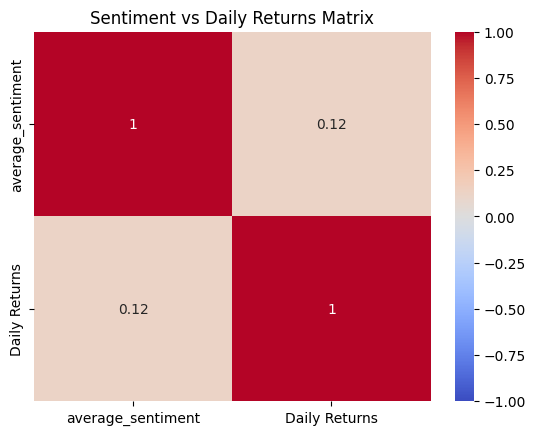

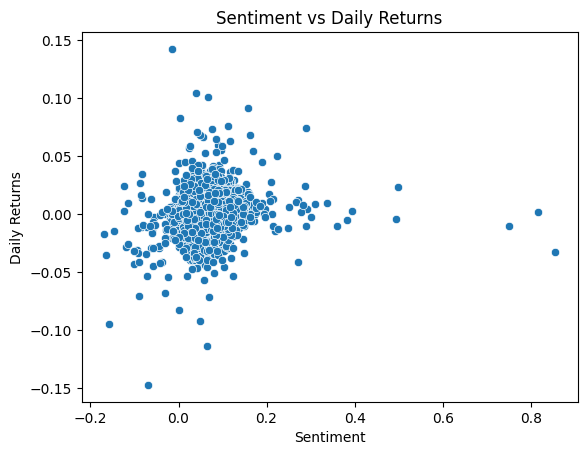

In [72]:
co.analyze_correlation_and_plot(aligned_date_MSFT)

Correlation between sentiment and daily stock returns: -0.007215964332299387


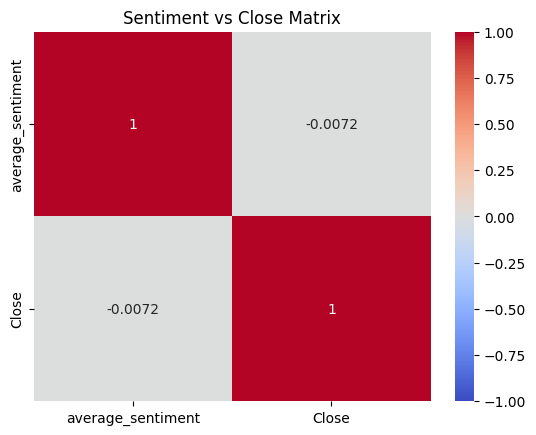

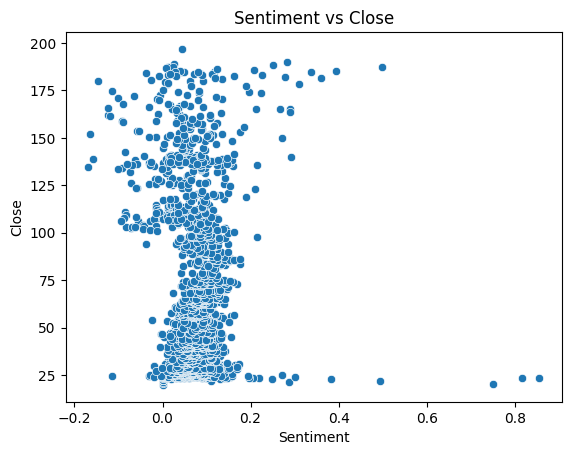

In [73]:
co.analyze_correlation_and_plot(aligned_date_MSFT, returns_col='Close')

Correlation between sentiment and daily stock returns: -0.008960408413513452


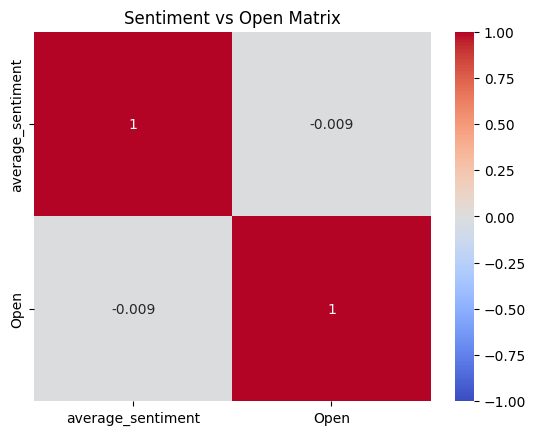

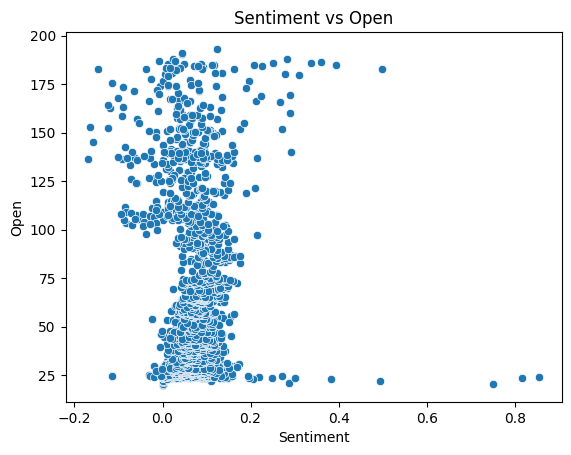

In [74]:
co.analyze_correlation_and_plot(aligned_date_MSFT, returns_col='Open')

Correlation between sentiment and daily stock returns: -0.010737281606622084


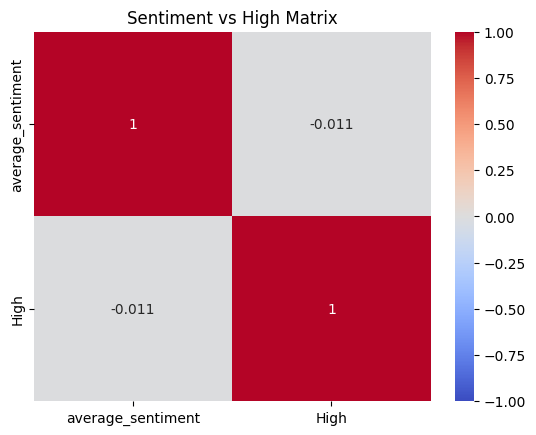

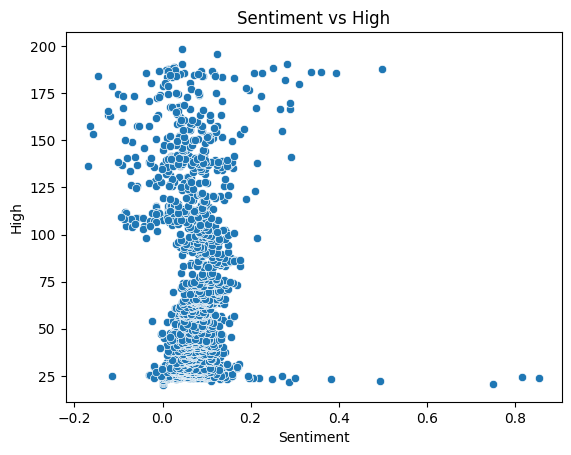

In [75]:
co.analyze_correlation_and_plot(aligned_date_MSFT, returns_col='High')

Correlation between sentiment and daily stock returns: -0.006210019313072645


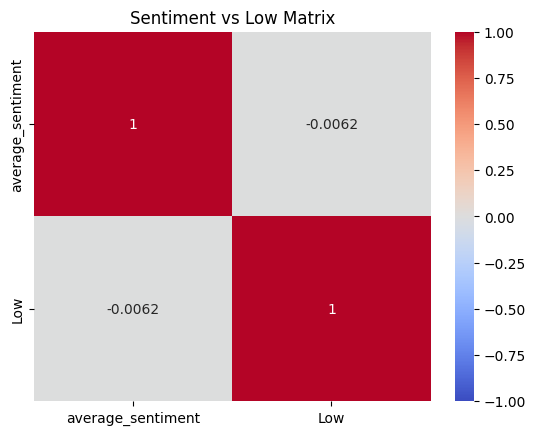

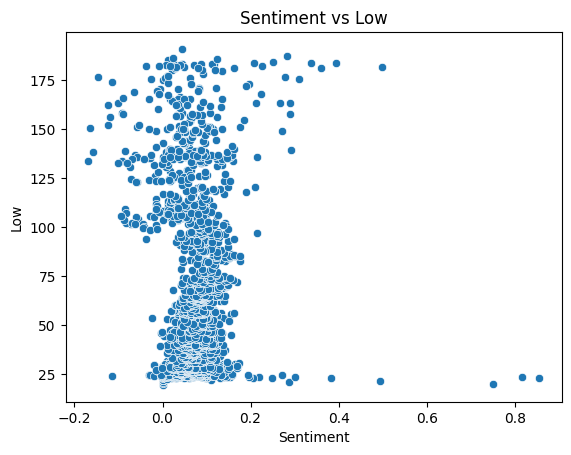

In [76]:
co.analyze_correlation_and_plot(aligned_date_MSFT, returns_col='Low')

Correlation between sentiment and daily stock returns: -0.007624051267632188


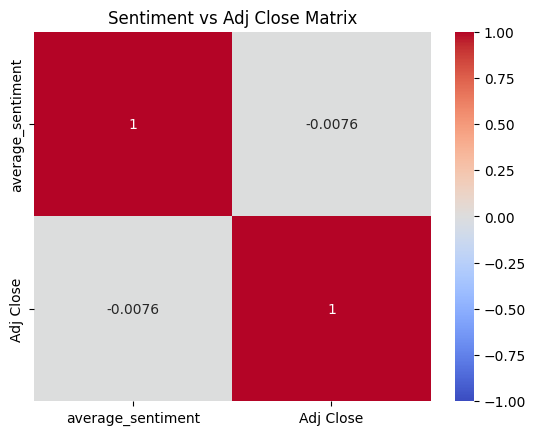

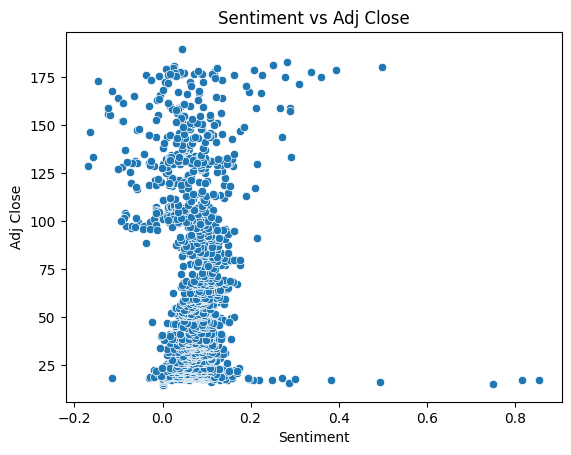

In [77]:
co.analyze_correlation_and_plot(aligned_date_MSFT, returns_col='Adj Close')

## NVDA

In [78]:
df_NVDA = co.read_csv_with_date(filepath=file_paths['NVDA'], date_col='Date')

In [79]:
co.check_nulls_and_info(df_NVDA, 'NVDA Data')

Total null values in NVDA Data: 0

NVDA Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6421 entries, 0 to 6420
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6421 non-null   datetime64[ns]
 1   Open          6421 non-null   float64       
 2   High          6421 non-null   float64       
 3   Low           6421 non-null   float64       
 4   Close         6421 non-null   float64       
 5   Adj Close     6421 non-null   float64       
 6   Volume        6421 non-null   int64         
 7   Dividends     6421 non-null   float64       
 8   Stock Splits  6421 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 451.6 KB
None




In [80]:
df_NVDA = co.convert_to_datetime(df_NVDA, date_col='Date')
df_NVDA.head(3)

Date      Open      High       Low     Close  \
0 1999-01-22 00:00:00+00:00  0.043750  0.048828  0.038802  0.041016   
1 1999-01-25 00:00:00+00:00  0.044271  0.045833  0.041016  0.045313   
2 1999-01-26 00:00:00+00:00  0.045833  0.046745  0.041146  0.041797   

   Adj Close      Volume  Dividends  Stock Splits  
0   0.037621  2714688000        0.0           0.0  
1   0.041562   510480000        0.0           0.0  
2   0.038337   343200000        0.0           0.0

In [81]:
df_NVDA = co.format_date_column(df_NVDA, date_col='Date')
df_NVDA.head(3)

Date      Open      High       Low     Close  Adj Close      Volume  \
0  1999-01-22  0.043750  0.048828  0.038802  0.041016   0.037621  2714688000   
1  1999-01-25  0.044271  0.045833  0.041016  0.045313   0.041562   510480000   
2  1999-01-26  0.045833  0.046745  0.041146  0.041797   0.038337   343200000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0

In [82]:
df_NVDA.rename(columns={"Date": "date"}, inplace=True)
df_NVDA.set_index('date', inplace=True)
df_NVDA.sample(5)

Open    High      Low    Close  Adj Close     Volume  \
date                                                                  
2010-02-05  0.39700  0.4065  0.39000  0.40550   0.371935  604856000   
2009-05-28  0.26325  0.2650  0.25150  0.26275   0.241001  995288000   
2007-09-19  0.88300  0.9000  0.85050  0.85900   0.787898  521360000   
2010-08-17  0.23100  0.2360  0.22875  0.23175   0.212567  481224000   
2012-09-19  0.33950  0.3475  0.33550  0.34275   0.314380  451936000   

            Dividends  Stock Splits  
date                                 
2010-02-05        0.0           0.0  
2009-05-28        0.0           0.0  
2007-09-19        0.0           0.0  
2010-08-17        0.0           0.0  
2012-09-19        0.0           0.0

In [83]:
df_NVDA = co.calculate_daily_returns(df_NVDA)

In [84]:
daily_sentiment_NVDA = co.aggregate_daily_sentiment(sentiment_data)
daily_sentiment_NVDA['date'] = pd.to_datetime(daily_sentiment_NVDA['date'], format='mixed', utc=True)
daily_sentiment_NVDA['date'] = daily_sentiment_NVDA['date'].dt.strftime('%Y-%m-%d')
daily_sentiment_NVDA.set_index("date", inplace=True)
daily_sentiment_NVDA

average_sentiment
date                         
2009-02-14           0.226300
2009-04-27           0.000000
2009-04-29           0.000000
2009-05-22           0.000000
2009-05-27           0.751050
...                       ...
2020-06-07           0.040156
2020-06-08           0.250061
2020-06-09           0.283393
2020-06-10           0.044021
2020-06-11           0.122841

[3955 rows x 1 columns]

In [85]:
aligned_date_NVDA = co.merge_dataframes(df_NVDA, daily_sentiment_NVDA)
aligned_date_NVDA

Open     High      Low    Close  Adj Close     Volume  \
date                                                                   
2009-04-27  0.28200  0.29000  0.27375  0.27550   0.252696  787024000   
2009-04-29  0.27750  0.27875  0.26875  0.27200   0.249486  859668000   
2009-05-22  0.24175  0.24900  0.23725  0.24550   0.225179  718260000   
2009-05-27  0.25750  0.26700  0.25500  0.25925   0.237791  814152000   
2009-05-29  0.26300  0.26350  0.25175  0.26075   0.239167  834232000   
...             ...      ...      ...      ...        ...        ...   
2020-06-05  8.79450  8.99700  8.70800  8.92000   8.893502  481748000   
2020-06-08  8.87725  8.88975  8.68575  8.80500   8.778847  387736000   
2020-06-09  8.80000  9.10975  8.75125  9.04600   9.019129  468488000   
2020-06-10  9.16775  9.50000  9.15350  9.36675   9.338925  632180000   
2020-06-11  9.15000  9.26125  8.78600  8.79625   8.770122  583652000   

            Dividends  Stock Splits  Daily Returns  average_sentiment  
date                                                                   
2009-04-27        0.0           0.0      -0.035871           0.000000  
2009-04-29        0.0           0.0      -0.015385           0.000000  
2009-05-22        0.0           0.0       0.015512           0.000000  
2009-05-27        0.0           0.0       0.001932           0.751050  
2009-05-29        0.0           0.0      -0.007612           0.000000  
...               ...           ...            ...                ...  
2020-06-05        0.0           0.0       0.017510           0.498827  
2020-06-08        0.0           0.0      -0.012892           0.250061  
2020-06-09        0.0           0.0       0.027371           0.283393  
2020-06-10        0.0           0.0       0.035458           0.044021  
2020-06-11        0.0           0.0      -0.060907           0.122841  

[2757 rows x 10 columns]

Correlation between sentiment and daily stock returns: 0.11459758587437816


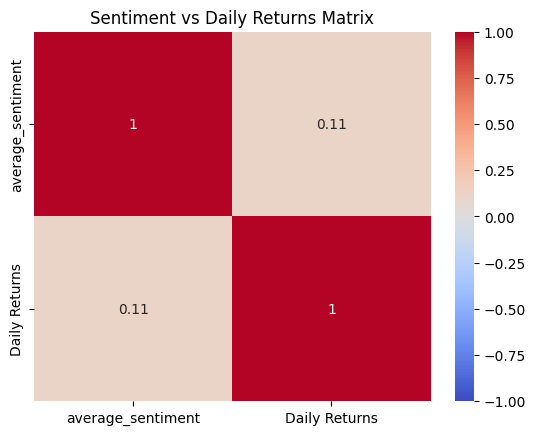

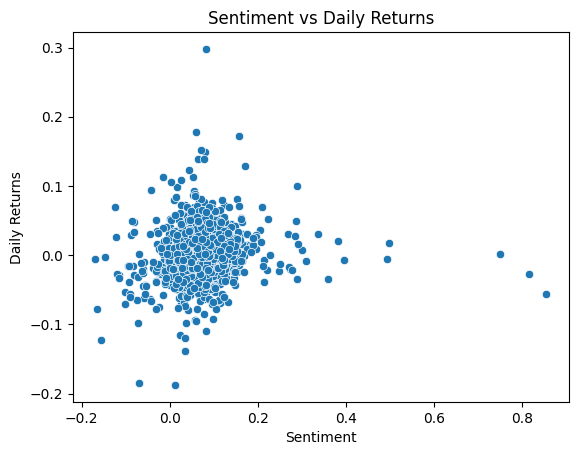

In [86]:
co.analyze_correlation_and_plot(aligned_date_NVDA)

Correlation between sentiment and daily stock returns: 0.0445908402879842


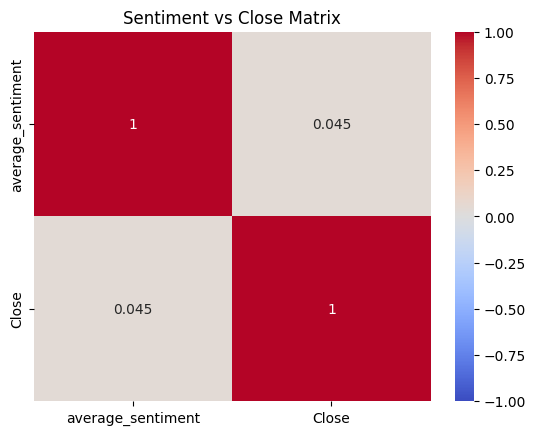

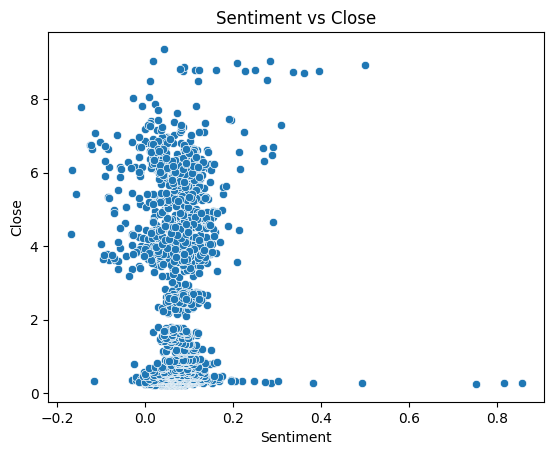

In [87]:
co.analyze_correlation_and_plot(aligned_date_NVDA, returns_col='Close')

Correlation between sentiment and daily stock returns: 0.043637868357941687


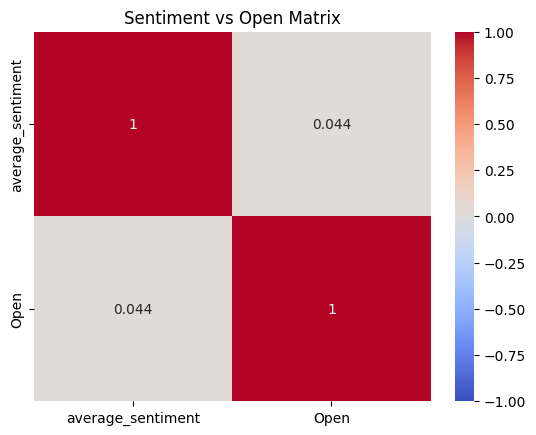

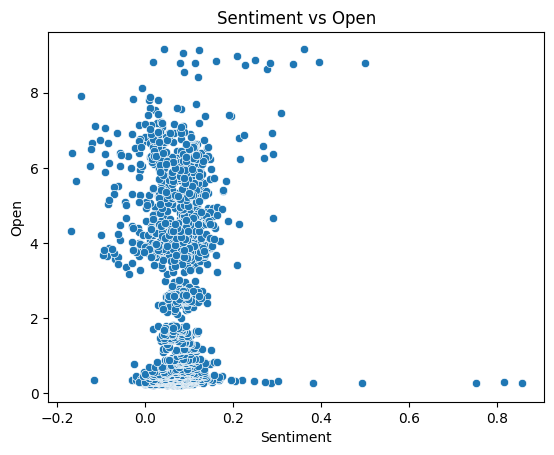

In [88]:
co.analyze_correlation_and_plot(aligned_date_NVDA, returns_col='Open')

Correlation between sentiment and daily stock returns: 0.041880597217510224


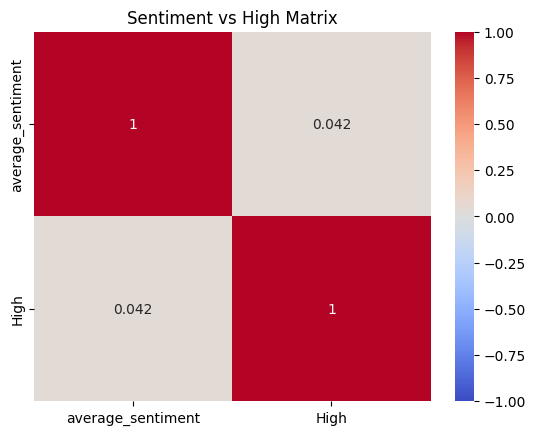

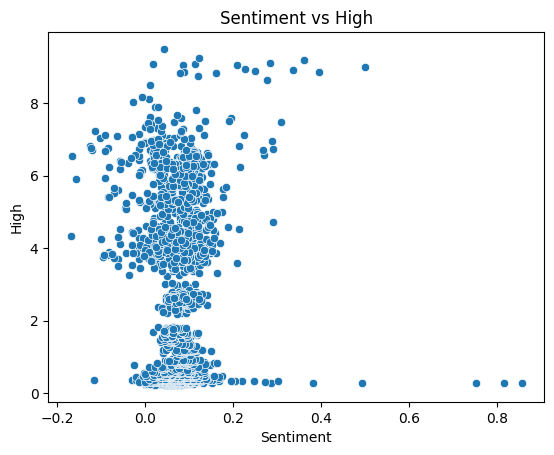

In [89]:
co.analyze_correlation_and_plot(aligned_date_NVDA, returns_col='High')

Correlation between sentiment and daily stock returns: 0.045833379004933505


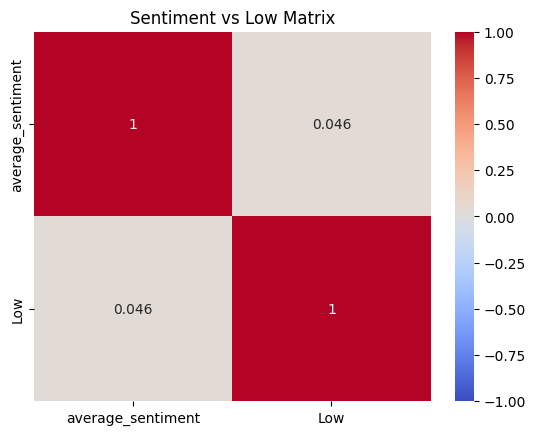

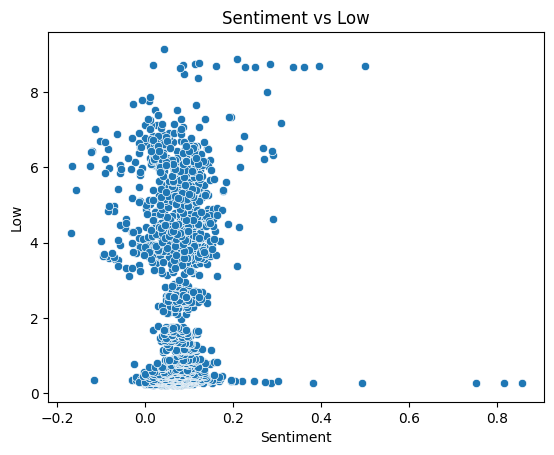

In [90]:
co.analyze_correlation_and_plot(aligned_date_NVDA, returns_col='Low')

Correlation between sentiment and daily stock returns: 0.04442003835117861


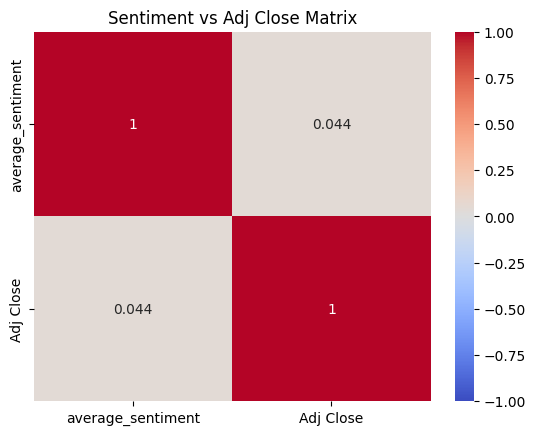

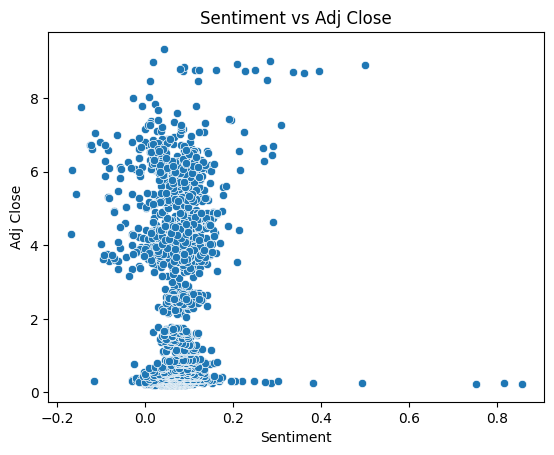

In [91]:
co.analyze_correlation_and_plot(aligned_date_NVDA, returns_col='Adj Close')

## TSLA

In [92]:
df_TSLA = co.read_csv_with_date(filepath=file_paths['TSLA'], date_col='Date')

In [93]:
co.check_nulls_and_info(df_TSLA, 'TSLA Data')

Total null values in TSLA Data: 0

TSLA Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6421 entries, 0 to 6420
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6421 non-null   datetime64[ns]
 1   Open          6421 non-null   float64       
 2   High          6421 non-null   float64       
 3   Low           6421 non-null   float64       
 4   Close         6421 non-null   float64       
 5   Adj Close     6421 non-null   float64       
 6   Volume        6421 non-null   int64         
 7   Dividends     6421 non-null   float64       
 8   Stock Splits  6421 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 451.6 KB
None




In [94]:
df_TSLA = co.convert_to_datetime(df_TSLA, date_col='Date')
df_TSLA.head(3)

Date      Open      High       Low     Close  \
0 1999-01-22 00:00:00+00:00  0.043750  0.048828  0.038802  0.041016   
1 1999-01-25 00:00:00+00:00  0.044271  0.045833  0.041016  0.045313   
2 1999-01-26 00:00:00+00:00  0.045833  0.046745  0.041146  0.041797   

   Adj Close      Volume  Dividends  Stock Splits  
0   0.037621  2714688000        0.0           0.0  
1   0.041562   510480000        0.0           0.0  
2   0.038337   343200000        0.0           0.0

In [95]:
df_TSLA = co.format_date_column(df_TSLA, date_col='Date')
df_TSLA.head(3)

Date      Open      High       Low     Close  Adj Close      Volume  \
0  1999-01-22  0.043750  0.048828  0.038802  0.041016   0.037621  2714688000   
1  1999-01-25  0.044271  0.045833  0.041016  0.045313   0.041562   510480000   
2  1999-01-26  0.045833  0.046745  0.041146  0.041797   0.038337   343200000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0

In [96]:
df_TSLA.rename(columns={"Date": "date"}, inplace=True)
df_TSLA.set_index('date', inplace=True)
df_TSLA.sample(5)

Open       High        Low      Close  Adj Close     Volume  \
date                                                                           
2024-02-07  68.319000  70.220001  67.599998  70.098999  70.089951  495575000   
2006-05-25   0.408333   0.414333   0.396500   0.398667   0.365668  423666000   
2008-07-29   0.288750   0.298500   0.285500   0.291250   0.267142  764636000   
1999-06-24   0.036198   0.036198   0.034896   0.035156   0.032246  115200000   
2000-07-31   0.237500   0.250521   0.225000   0.250000   0.229307  371232000   

            Dividends  Stock Splits  
date                                 
2024-02-07        0.0           0.0  
2006-05-25        0.0           0.0  
2008-07-29        0.0           0.0  
1999-06-24        0.0           0.0  
2000-07-31        0.0           0.0

In [97]:
df_TSLA = co.calculate_daily_returns(df_TSLA)

In [98]:
daily_sentiment_TSLA = co.aggregate_daily_sentiment(sentiment_data)
daily_sentiment_TSLA['date'] = pd.to_datetime(daily_sentiment_TSLA['date'], format='mixed', utc=True)
daily_sentiment_TSLA['date'] = daily_sentiment_TSLA['date'].dt.strftime('%Y-%m-%d')
daily_sentiment_TSLA.set_index("date", inplace=True)
daily_sentiment_TSLA

average_sentiment
date                         
2009-02-14           0.226300
2009-04-27           0.000000
2009-04-29           0.000000
2009-05-22           0.000000
2009-05-27           0.751050
...                       ...
2020-06-07           0.040156
2020-06-08           0.250061
2020-06-09           0.283393
2020-06-10           0.044021
2020-06-11           0.122841

[3955 rows x 1 columns]

In [99]:
aligned_date_TSLA = co.merge_dataframes(df_TSLA, daily_sentiment_TSLA)

Correlation between sentiment and daily stock returns: 0.11459758587437816


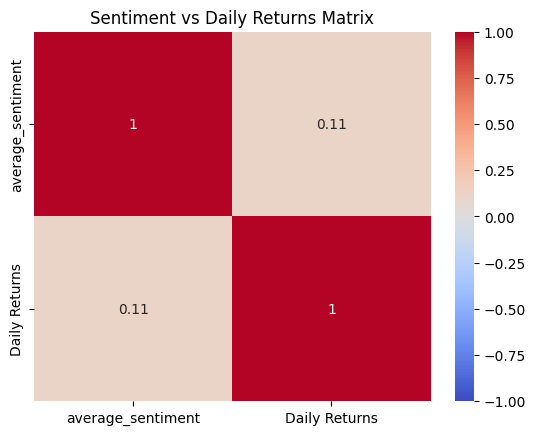

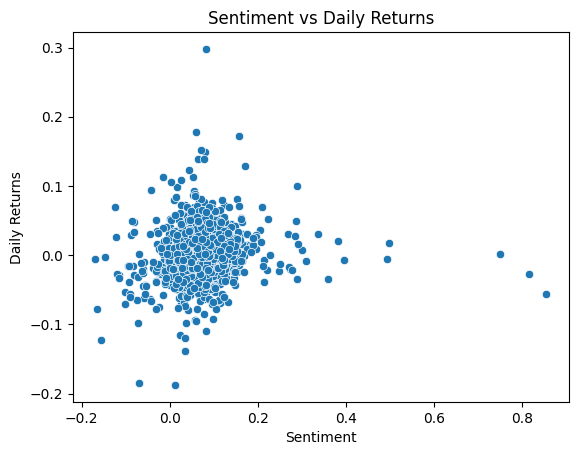

In [100]:
co.analyze_correlation_and_plot(aligned_date_TSLA)

Correlation between sentiment and daily stock returns: 0.0445908402879842


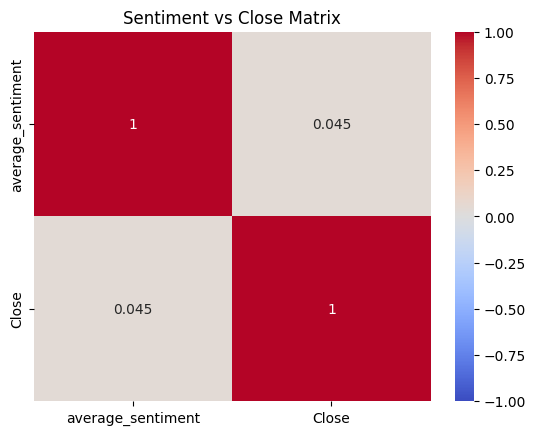

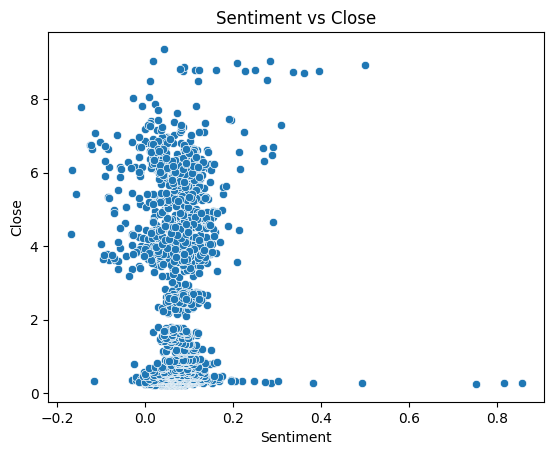

In [101]:
co.analyze_correlation_and_plot(aligned_date_TSLA, returns_col='Close')

Correlation between sentiment and daily stock returns: 0.043637868357941687


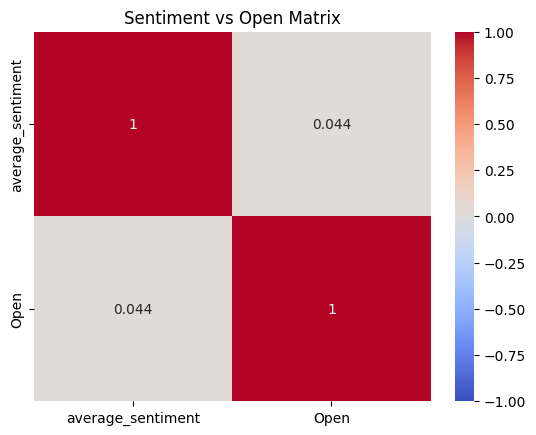

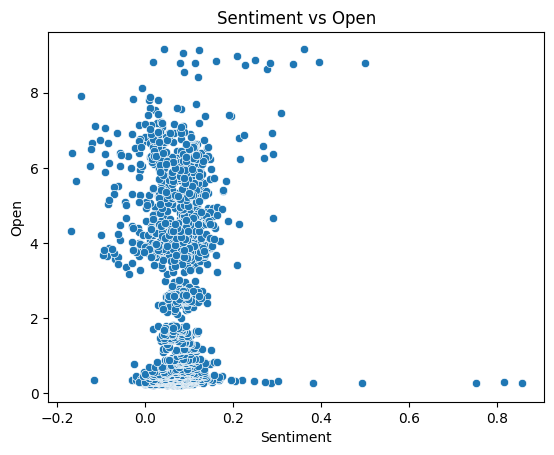

In [102]:
co.analyze_correlation_and_plot(aligned_date_TSLA, returns_col='Open')

Correlation between sentiment and daily stock returns: 0.041880597217510224


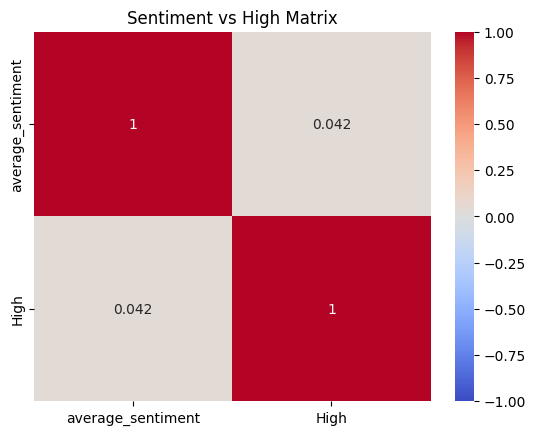

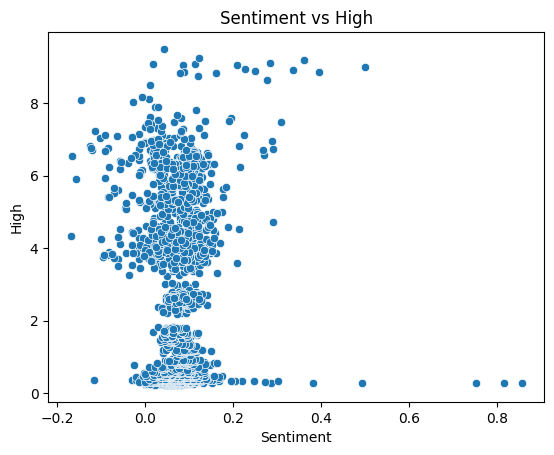

In [103]:
co.analyze_correlation_and_plot(aligned_date_TSLA, returns_col='High')

Correlation between sentiment and daily stock returns: 0.045833379004933505


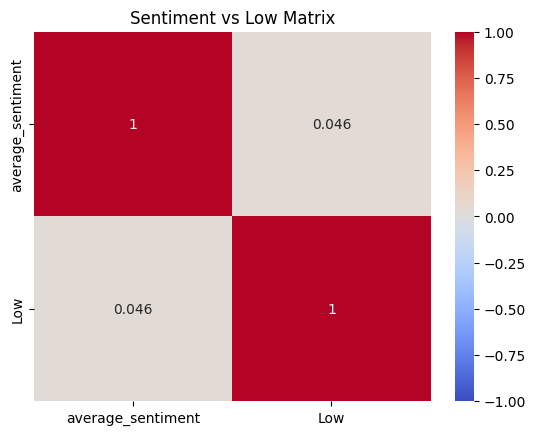

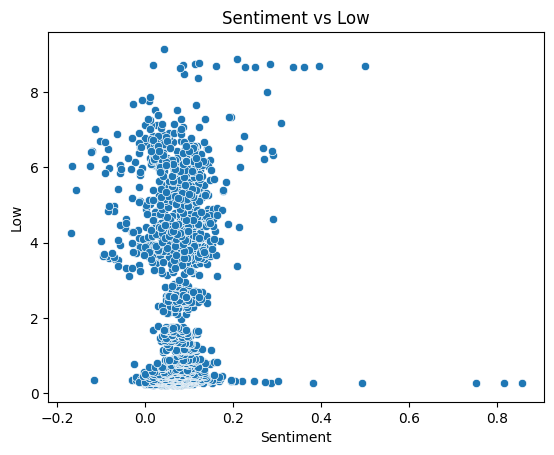

In [104]:
co.analyze_correlation_and_plot(aligned_date_TSLA, returns_col='Low')

Correlation between sentiment and daily stock returns: 0.04442003835117861


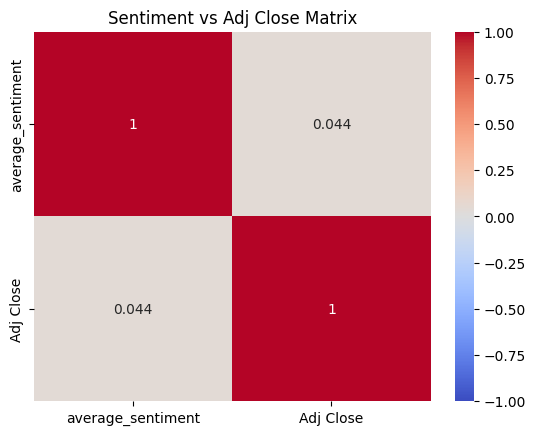

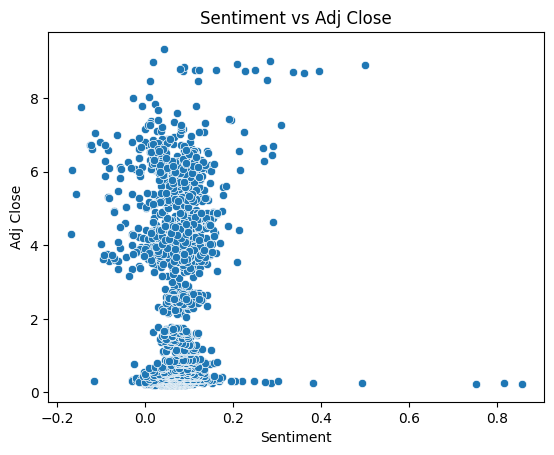

In [105]:
co.analyze_correlation_and_plot(aligned_date_TSLA, returns_col='Adj Close')